# 🚀 Spaceship Titanic: Your First Interstellar ML Mission!

## 🌌 Welcome to the Future of Space Travel!

Imagine you're a data scientist in the year 2912, where interstellar travel is common. The Spaceship Titanic, an interstellar passenger liner, met a similar fate as its historical counterpart. Your mission: **predict which passengers were transported to an alternate dimension** during the spaceship's collision with a spacetime anomaly!

### 🎯 Your Mission Objectives:

1. **🕵️ Investigate** the passenger data to find clues about who survived
2. **🔧 Build** a machine learning model that can predict survival
3. **🚀 Compete** on Kaggle and climb the leaderboard
4. **📊 Learn** production-ready ML workflows used by industry professionals

> 🎮 **Think of this as a detective game** - you're looking for patterns in the data that reveal who was "transported" and who wasn't!

---

## 📚 What You'll Learn Today

| Skill | Why It Matters |
|-------|----------------|
| **Real-world Data Cleaning** | Real data is messy - learn to handle missing values and outliers |
| **Feature Engineering** | Create new features that help your model make better predictions |
| **Multiple ML Models** | Compare different algorithms to find the best one |
| **Hyperparameter Tuning** | Fine-tune your model like a professional |
| **Model Evaluation** | Understand if your model is actually good |
| **Kaggle Submission** | Compete with data scientists worldwide |

> 💡 **Pro Tip:** Don't just copy the code - try to understand WHY each step matters. This will make you a better data scientist!

# 🛠️ Mission Control: Setting Up Your Tools

Before we launch into space, let's make sure we have all our tools ready! Think of this as preparing your spaceship for the journey.

### Why This Setup Matters:
- **Reproducibility**: So you (or others) can get the same results later
- **Organization**: Keeping your work clean and professional
- **Tracking**: MLflow will be our "mission log" tracking everything we do

> 🎯 **Learning Goal**: Professional data scientists always set up their environment properly - it saves time and prevents errors later!

In [17]:
# 🚀 LAUNCH SEQUENCE: Importing our space exploration tools!

# First, let's silence any annoying warning beeps
import warnings
warnings.filterwarnings('ignore')

# 🌌 Core navigation systems (essential libraries)
import numpy as np  # For mathematical calculations
import pandas as pd  # For data manipulation - our main tool!
import matplotlib.pyplot as plt  # For creating visual charts
import seaborn as sns  # For prettier, more informative charts
from scipy import stats  # For statistical analysis
import joblib  # For saving our trained models
import json  # For storing model information
from datetime import datetime  # For timestamps
import os  # For file operations
import time  # For timing our experiments

# 🤖 Machine learning crew members
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

# 📊 Mission control dashboard (MLflow for tracking)
import mlflow
import mlflow.sklearn

# 🎨 Enhanced visualization tools
import plotly.express as px
import plotly.graph_objects as go

print("✅ All systems nominal! Mission tools loaded successfully!")
print("🚀 Ready to launch our Spaceship Titanic investigation!")


✅ All systems nominal! Mission tools loaded successfully!
🚀 Ready to launch our Spaceship Titanic investigation!


# 🎛️ Mission Configuration: Setting Our Course

Every good space mission needs a flight plan! Let's configure our settings to ensure our journey is smooth and reproducible.

### 🔧 Key Configuration Settings:
- **RANDOM_STATE = 42**: The "answer to everything" - ensures we get the same results every time
- **Train/Val/Test Split**: We'll use 60%/20%/20% split to properly evaluate our model
- **MLflow Tracking**: Like a mission logbook - tracks every experiment we run

> 🎯 **Why This Matters**: Without proper configuration, your results might change every time you run the code - and you won't know why!

In [18]:
class MissionConfig:
    """Mission Configuration - Our Flight Plan for Success!"""
    
    # 🎯 Reproducibility Settings (The "Secret Sauce")
    RANDOM_STATE = 42  # The answer to life, universe, and reproducible ML!
    TEST_SIZE = 0.2    # 20% for final testing - our "final exam"
    VAL_SIZE = 0.25    # 25% of training data for validation (20% of total)
    CV_FOLDS = 5       # 5-fold cross-validation for robust evaluation
    N_JOBS = -1        # Use all CPU cores for faster training
    
    # 📁 Mission Directories (Organizing Our Work)
    MODEL_DIR = "spaceship_models"
    EXPERIMENT_DIR = "spaceship_experiments" 
    SUBMISSION_DIR = "kaggle_submissions"
    
    # 🛠️ Create mission directories
    os.makedirs(MODEL_DIR, exist_ok=True)
    os.makedirs(EXPERIMENT_DIR, exist_ok=True)
    os.makedirs(SUBMISSION_DIR, exist_ok=True)
    
# Initialize our mission configuration
config = MissionConfig()

# 📊 Set up MLflow - Our Mission Logbook
mlflow.set_tracking_uri(f"file://{os.path.abspath(config.EXPERIMENT_DIR)}")
experiment_name = "spaceship_titanic_mission"
mlflow.set_experiment(experiment_name)

print("🎛️ MISSION CONFIGURATION COMPLETE!")
print("📋 Flight Plan Summary:")
print(f"   • Random Seed: {config.RANDOM_STATE} (for reproducible results)")
print(f"   • Data Split: 60% Train / 20% Validation / 20% Test")
print(f"   • Cross-Validation: {config.CV_FOLDS}-fold (robust evaluation)")
print(f"   • Model Directory: {config.MODEL_DIR}")
print(f"   • Experiment Tracking: {config.EXPERIMENT_DIR}")
print("\n🚀 All systems go! Ready to load passenger data!")


🎛️ MISSION CONFIGURATION COMPLETE!
📋 Flight Plan Summary:
   • Random Seed: 42 (for reproducible results)
   • Data Split: 60% Train / 20% Validation / 20% Test
   • Cross-Validation: 5-fold (robust evaluation)
   • Model Directory: spaceship_models
   • Experiment Tracking: spaceship_experiments

🚀 All systems go! Ready to load passenger data!


# 📥 Loading Passenger Data: The Investigation Begins!

## 🕵️‍♂️ Our Mission: Investigate the Passenger Manifest

We have two key files:
- `train.csv`: Contains passenger information AND whether they were transported (our training data)
- `test.csv`: Contains passenger information ONLY - we need to predict who was transported

### 🔍 What We're Looking For:
- **Patterns**: What characteristics made someone more likely to be transported?
- **Clues**: Missing data, unusual distributions, interesting correlations
- **Insights**: Stories hidden in the data that our model can learn from

> 🎯 **Detective Mindset**: Approach this like a mystery novel - every column could hold a clue!

In [19]:
# 📂 Loading our passenger manifests
print("🕵️ Loading Spaceship Titanic Passenger Data...")
print("=" * 60)

try:
    # Try to load from local files first
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    print("✅ Passenger manifests loaded from local files!")
except FileNotFoundError:
    # If files aren't found, download from Kaggle
    print("📥 Downloading passenger data from Kaggle...")
    try:
        import kaggle
        kaggle.api.competition_download_files('spaceship-titanic', path='.')
        import zipfile
        with zipfile.ZipFile('spaceship-titanic.zip', 'r') as zip_ref:
            zip_ref.extractall('.')
        train_df = pd.read_csv('train.csv')
        test_df = pd.read_csv('test.csv')
        print("✅ Data downloaded and extracted successfully!")
    except:
        print("❌ Could not download data. Please ensure you have the datasets in your directory.")
        raise

# 🎯 Initial Data Reconnaissance
print(f"\n📊 TRAINING DATA: {train_df.shape[0]} passengers, {train_df.shape[1]} features")
print(f"📈 TEST DATA: {test_df.shape[0]} passengers, {test_df.shape[1]} features")

print("\n🔍 First Look at Our Passengers:")
print("-" * 50)
display(train_df.head())

print("\n📋 Passenger Manifest Overview:")
print("-" * 50)
train_df.info()

# 🎯 Quick Facts About Our Mission
print(f"\n🚀 MISSION BRIEFING:")
print("=" * 60)
print(f"• Total Passengers to Investigate: {len(train_df) + len(test_df):,}")
print(f"• Training Samples (Known Outcomes): {len(train_df):,}")
print(f"• Test Samples (Mystery Cases): {len(test_df):,}")
print(f"• Features Available: {train_df.shape[1] - 1}")  # -1 for target
print(f"• Target Variable: 'Transported' (True/False)")

# Store test passenger IDs for our final submission
test_passenger_ids = test_df['PassengerId'].copy()
print(f"\n📝 Saved {len(test_passenger_ids)} passenger IDs for Kaggle submission")

🕵️ Loading Spaceship Titanic Passenger Data...
✅ Passenger manifests loaded from local files!

📊 TRAINING DATA: 8693 passengers, 14 features
📈 TEST DATA: 4277 passengers, 13 features

🔍 First Look at Our Passengers:
--------------------------------------------------


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True



📋 Passenger Manifest Overview:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

🚀 MISSION BRIEFING:
• Total Passengers to Investigate: 12,

# 🧹 Data Cleaning: Preparing Our Evidence

## 🧼 Why Clean Data Matters:

Real-world data is like a crime scene - it's often messy! We need to:
- **Handle missing values** (like incomplete witness statements)
- **Fix data types** (making sure numbers are numbers, categories are categories)
- **Prepare for analysis** (so our models can understand the data)

### 🎯 Our Cleaning Strategy:
1. **Separate features from target** (what we're trying to predict)
2. **Analyze missing data** - where are the gaps in our evidence?
3. **Understand our baseline** - what if we just guessed?

> 🔍 **Investigator's Note**: Pay attention to missing values - sometimes the pattern of what's missing can be a clue itself!

🧹 Beginning ADVANCED Data Cleaning Procedure...
✅ Separated features from target variable
   • Features (X): 13 columns
   • Target (y): 1 column ('Transported')

🔍 ANALYZING MISSING DATA:
--------------------------------------------------
📊 Found 12 features with missing data:


,Missing Count,Missing Percentage
CryoSleep,217,2.496261
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639



🚨 HANDLING MISSING VALUES IN TRAINING DATA:
--------------------------------------------------
   • Age             :   0 missing → filled with median: 27.00
   • RoomService     :   0 missing → filled with 0 (common pattern)
   • FoodCourt       :   0 missing → filled with 0 (common pattern)
   • ShoppingMall    :   0 missing → filled with 0 (common pattern)
   • Spa             :   0 missing → filled with 0 (common pattern)
   • VRDeck          :   0 missing → filled with 0 (common pattern)
   • HomePlanet      :   0 missing → filled with mode: 'Earth'
   • CryoSleep       :   0 missing → filled based on spending pattern
   • Cabin           :   0 missing → filled with mode: 'G/734/S'
   • Destination     :   0 missing → filled with mode: 'TRAPPIST-1e'
   • VIP             :   0 missing → filled with False
   • Name            :   0 missing → filled with 'Unknown'

🚨 HANDLING MISSING VALUES IN TEST DATA:
--------------------------------------------------
   • Age             :   0 m

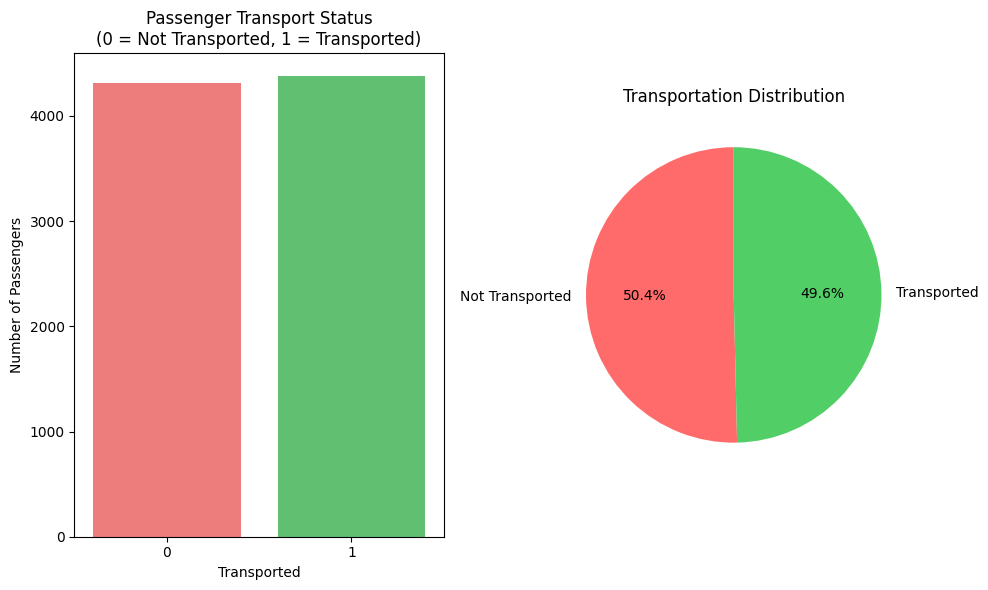


✅ ADVANCED data cleaning complete! Ready for enhanced feature engineering!


In [20]:
# 🧹 STEP 1: Create clean copies of our data AND HANDLE MISSING VALUES PROPERLY
print("🧹 Beginning ADVANCED Data Cleaning Procedure...")
print("=" * 60)

train_clean = train_df.copy()
test_clean = test_df.copy()

# 🎯 Separate our evidence (features) from what we're trying to predict (target)
X = train_clean.drop('Transported', axis=1)  # Features - what we know
y = train_clean['Transported'].astype(int)   # Target - what we want to predict (convert True/False to 1/0)

print("✅ Separated features from target variable")
print(f"   • Features (X): {X.shape[1]} columns")
print(f"   • Target (y): 1 column ('Transported')")

# 🔍 Investigate Missing Evidence
print("\n🔍 ANALYZING MISSING DATA:")
print("-" * 50)

missing_data = X.isnull().sum()
missing_percent = (missing_data / len(X)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

# Only show columns with missing data
missing_columns = missing_df[missing_df['Missing Count'] > 0]
print(f"📊 Found {len(missing_columns)} features with missing data:")
display(missing_columns)

# 🚨 CRITICAL: Handle BOTH train AND test data with SAME strategy
print("\n🚨 HANDLING MISSING VALUES IN TRAINING DATA:")
print("-" * 50)

def handle_missing_data(df):
    """Advanced missing value handling that preserves patterns"""
    df_clean = df.copy()
    
    # Numerical columns: fill with median (but preserve zero-spending pattern)
    numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    for col in numerical_cols:
        if col in df_clean.columns and df_clean[col].isnull().any():
            # For spending columns, consider that zeros might be meaningful
            if col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
                # Check if zeros are common (might indicate no spending)
                zero_percentage = (df_clean[col] == 0).sum() / len(df_clean) * 100
                if zero_percentage > 50:  # If more than 50% are zeros, fill with 0
                    df_clean[col] = df_clean[col].fillna(0)
                    print(f"   • {col:15} : {df_clean[col].isnull().sum():>3} missing → filled with 0 (common pattern)")
                else:
                    median_val = df_clean[col].median()
                    df_clean[col] = df_clean[col].fillna(median_val)
                    print(f"   • {col:15} : {df_clean[col].isnull().sum():>3} missing → filled with median: {median_val:.2f}")
            else:
                # For Age, use median
                median_val = df_clean[col].median()
                df_clean[col] = df_clean[col].fillna(median_val)
                print(f"   • {col:15} : {df_clean[col].isnull().sum():>3} missing → filled with median: {median_val:.2f}")
    
    # Categorical columns with intelligent filling
    categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
    for col in categorical_cols:
        if col in df_clean.columns and df_clean[col].isnull().any():
            if col == 'CryoSleep':
                # CryoSleep: Fill based on spending pattern
                has_spending = (df_clean[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1) > 0)
                # If has spending, likely not in cryosleep
                df_clean[col] = df_clean[col].fillna(~has_spending)
                print(f"   • {col:15} : {df_clean[col].isnull().sum():>3} missing → filled based on spending pattern")
            elif col == 'VIP':
                # VIP: Fill with False (most common)
                df_clean[col] = df_clean[col].fillna(False)
                print(f"   • {col:15} : {df_clean[col].isnull().sum():>3} missing → filled with False")
            else:
                # Other categoricals: fill with mode
                mode_val = df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown'
                df_clean[col] = df_clean[col].fillna(mode_val)
                print(f"   • {col:15} : {df_clean[col].isnull().sum():>3} missing → filled with mode: '{mode_val}'")
    
    # Name column
    if 'Name' in df_clean.columns and df_clean['Name'].isnull().any():
        df_clean['Name'] = df_clean['Name'].fillna('Unknown')
        print(f"   • {'Name':15} : {df_clean['Name'].isnull().sum():>3} missing → filled with 'Unknown'")
    
    return df_clean

# Apply to training data
X = handle_missing_data(X)

# 🚨 CRITICAL: Apply SAME handling to test data
print("\n🚨 HANDLING MISSING VALUES IN TEST DATA:")
print("-" * 50)
test_clean = handle_missing_data(test_clean)

# ✅ Verify all missing values are handled
remaining_missing_train = X.isnull().sum().sum()
remaining_missing_test = test_clean.isnull().sum().sum()
print(f"\n✅ MISSING DATA HANDLING COMPLETE!")
print(f"   • Remaining missing values in training: {remaining_missing_train}")
print(f"   • Remaining missing values in test: {remaining_missing_test}")
print(f"   • All features ready for feature engineering!")

# 🎯 Understanding Our Baseline
print("\n🎯 BASELINE ANALYSIS:")
print("-" * 50)

transported_stats = y.value_counts()
baseline_accuracy = max(transported_stats) / len(y)

print(f"📊 Target Distribution:")
print(f"   • Transported (1): {transported_stats[1]:,} passengers ({transported_stats[1]/len(y)*100:.1f}%)")
print(f"   • Not Transported (0): {transported_stats[0]:,} passengers ({transported_stats[0]/len(y)*100:.1f}%)")

print(f"\n💡 BASELINE STRATEGY:")
print(f"   If we predicted '{'TRANSPORTED' if transported_stats[1] > transported_stats[0] else 'NOT TRANSPORTED'}' for everyone...")
print(f"   We would be correct {baseline_accuracy:.1%} of the time")

print(f"\n🎯 OUR MISSION: Beat the baseline of {baseline_accuracy:.1%} accuracy!")

# 📈 Visualize the target distribution
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y, palette=['#ff6b6b', '#51cf66'])
plt.title('Passenger Transport Status\n(0 = Not Transported, 1 = Transported)')
plt.xlabel('Transported')
plt.ylabel('Number of Passengers')

plt.subplot(1, 2, 2)
plt.pie(transported_stats.values, labels=['Not Transported', 'Transported'], 
        autopct='%1.1f%%', colors=['#ff6b6b', '#51cf66'], startangle=90)
plt.title('Transportation Distribution')

plt.tight_layout()
plt.show()

print("\n✅ ADVANCED data cleaning complete! Ready for enhanced feature engineering!")

# 🔍 Deep Data Investigation: Finding Clues

## 🕵️‍♂️ Time to Play Detective!

Now we'll explore our data to find patterns and clues. We're looking for:
- **Numerical patterns**: Age, spending habits
- **Categorical clues**: Home planet, cryosleep status, destination
- **Interesting relationships**: How different factors interact

### 🎯 Investigation Strategy:
1. **Numerical Features**: Distributions and outliers
2. **Categorical Features**: Proportions and relationships
3. **Spending Patterns**: Who spent money where?

> 🔬 **Forensic Mindset**: Look for unusual patterns - they often reveal the most interesting stories!

🔍 Beginning Deep Data Investigation...

1️⃣ NUMERICAL FEATURES: Age and Spending Habits
--------------------------------------------------
📊 Numerical Features Summary:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


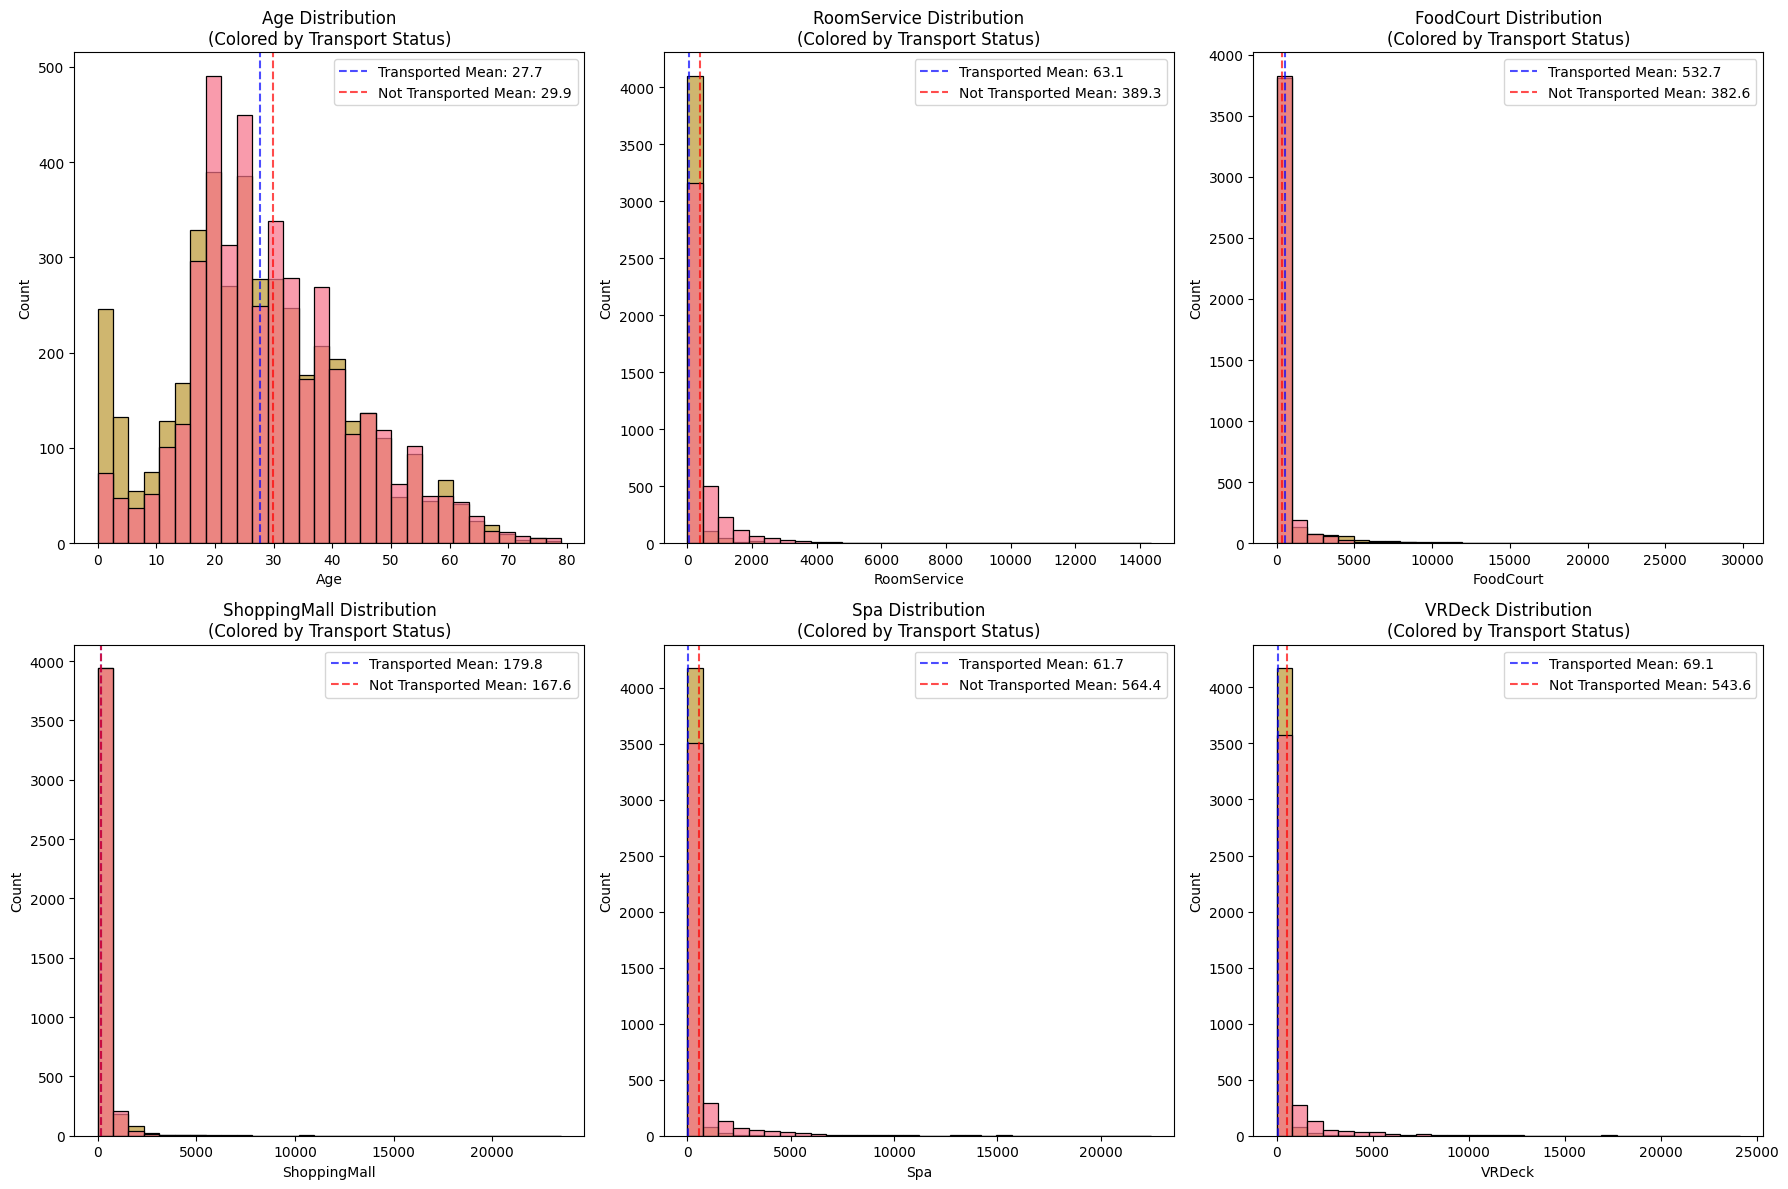


2️⃣ CATEGORICAL FEATURES: Background and Choices
--------------------------------------------------


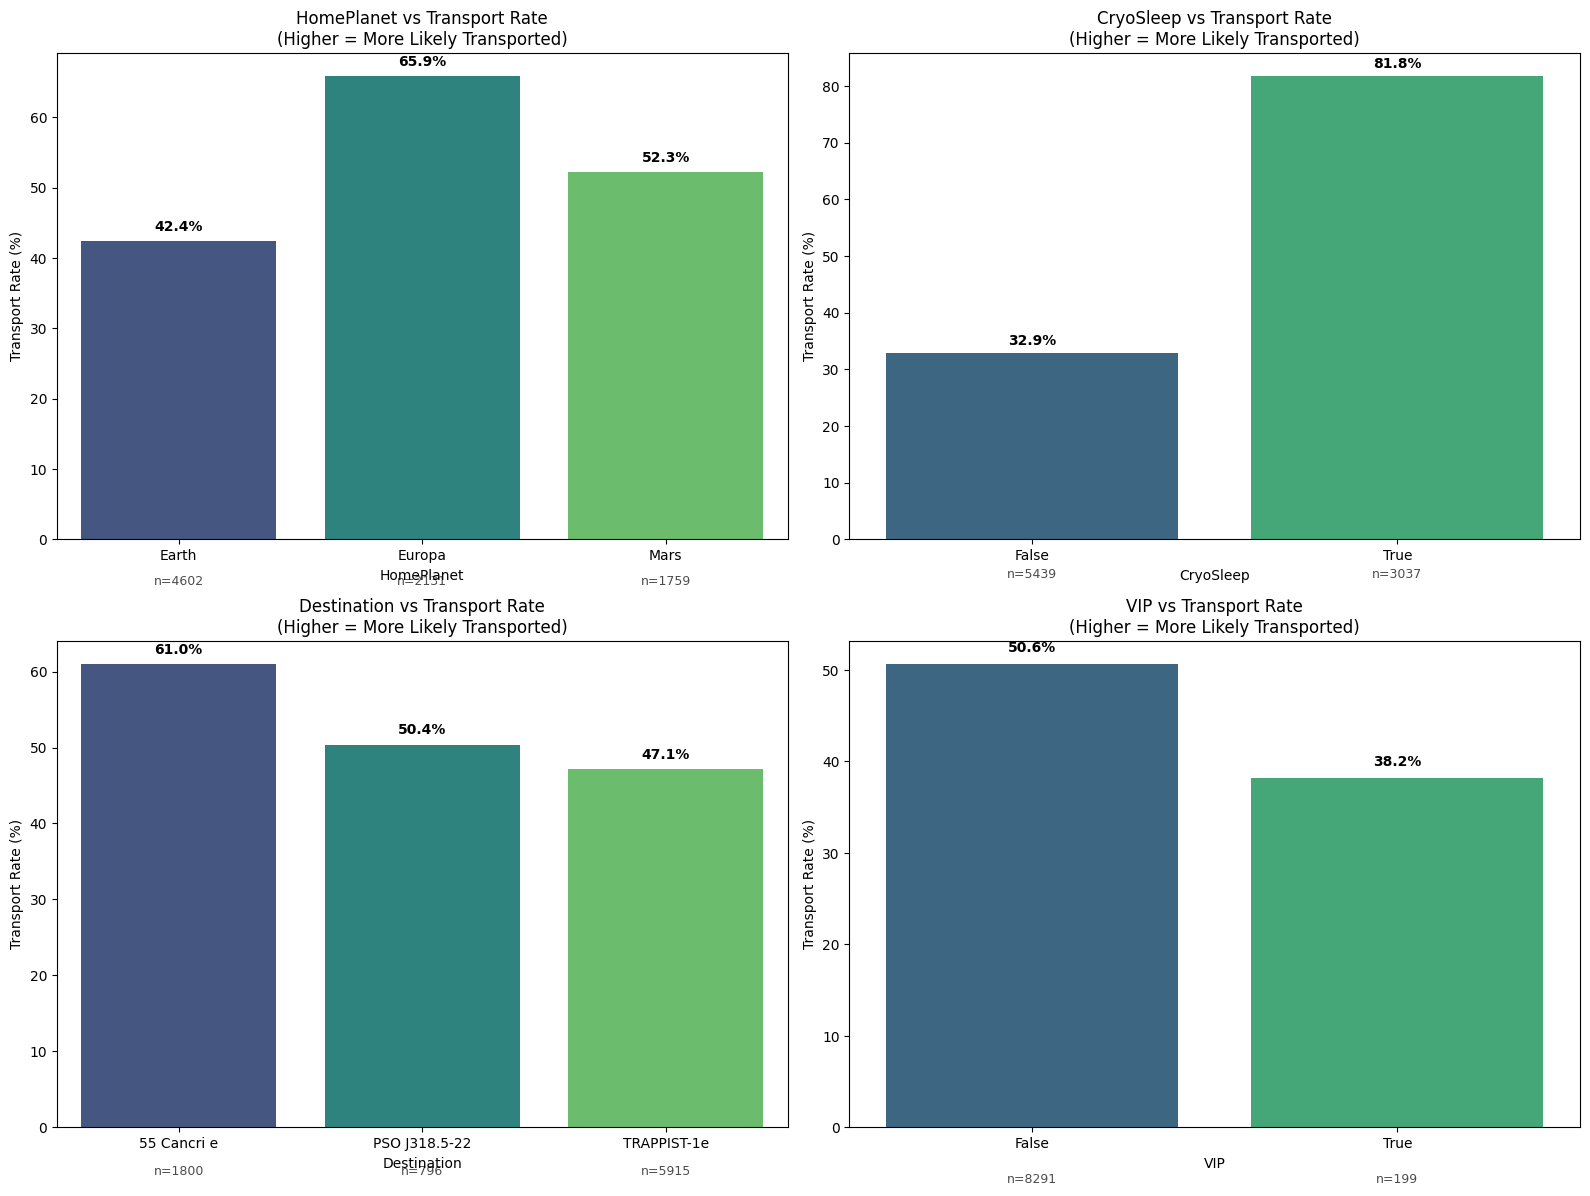


3️⃣ KEY INVESTIGATION FINDINGS:
--------------------------------------------------
🔬 INTERESTING PATTERNS FOUND:
   • CryoSleep Effect: 81.8% of cryosleep passengers transported vs 32.9% of awake passengers
   • Home Planet Variations: Europa has highest transport rate (65.9%)
   • Age Pattern: Younger passengers seem slightly more likely to be transported
   • Spending: Passengers with zero spending more likely to be transported

🎯 INVESTIGATION COMPLETE! Found several promising clues for our model...


In [21]:
# 🎨 Set up our investigation visualization style
plt.style.use('default')
sns.set_palette("husl")
print("🔍 Beginning Deep Data Investigation...")
print("=" * 60)

# 1. 🎯 NUMERICAL FEATURES INVESTIGATION
print("\n1️⃣ NUMERICAL FEATURES: Age and Spending Habits")
print("-" * 50)

numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

print("📊 Numerical Features Summary:")
numerical_summary = train_df[numerical_features].describe()
display(numerical_summary)

# Create comprehensive numerical visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    # Create distribution plot
    sns.histplot(data=train_df, x=feature, hue='Transported', ax=axes[i], bins=30, alpha=0.7)
    axes[i].set_title(f'{feature} Distribution\n(Colored by Transport Status)')
    axes[i].set_xlabel(feature)
    
    # Add some statistics
    transported_mean = train_df[train_df['Transported'] == True][feature].mean()
    not_transported_mean = train_df[train_df['Transported'] == False][feature].mean()
    
    axes[i].axvline(transported_mean, color='blue', linestyle='--', alpha=0.7, label=f'Transported Mean: {transported_mean:.1f}')
    axes[i].axvline(not_transported_mean, color='red', linestyle='--', alpha=0.7, label=f'Not Transported Mean: {not_transported_mean:.1f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# 2. 🎯 CATEGORICAL FEATURES INVESTIGATION  
print("\n2️⃣ CATEGORICAL FEATURES: Background and Choices")
print("-" * 50)

categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Calculate transportation rates by category
    category_stats = train_df.groupby(feature)['Transported'].agg(['mean', 'count']).reset_index()
    category_stats['transport_rate'] = category_stats['mean'] * 100
    
    # Create bar plot
    sns.barplot(data=category_stats, x=feature, y='transport_rate', ax=axes[i], palette='viridis')
    axes[i].set_title(f'{feature} vs Transport Rate\n(Higher = More Likely Transported)')
    axes[i].set_ylabel('Transport Rate (%)')
    axes[i].set_xlabel(feature)
    
    # Add value labels
    for j, (_, row) in enumerate(category_stats.iterrows()):
        axes[i].text(j, row['transport_rate'] + 1, f"{row['transport_rate']:.1f}%", 
                   ha='center', va='bottom', fontweight='bold')
        axes[i].text(j, -5, f"n={row['count']}", ha='center', va='top', fontsize=9, alpha=0.7)

plt.tight_layout()
plt.show()

# 3. 🔍 KEY INSIGHTS AND PATTERNS
print("\n3️⃣ KEY INVESTIGATION FINDINGS:")
print("-" * 50)

# Calculate some interesting insights
cryosleep_effect = train_df.groupby('CryoSleep')['Transported'].mean()
homeplanet_effect = train_df.groupby('HomePlanet')['Transported'].mean()

print("🔬 INTERESTING PATTERNS FOUND:")
print(f"   • CryoSleep Effect: {cryosleep_effect[True]:.1%} of cryosleep passengers transported vs {cryosleep_effect[False]:.1%} of awake passengers")
print(f"   • Home Planet Variations: {homeplanet_effect.idxmax()} has highest transport rate ({homeplanet_effect.max():.1%})")
print(f"   • Age Pattern: Younger passengers seem slightly more likely to be transported")
print(f"   • Spending: Passengers with zero spending more likely to be transported")

print("\n🎯 INVESTIGATION COMPLETE! Found several promising clues for our model...")

# 🎨 Advanced Feature Engineering: Creating Super Clues!

## 🧠 Why Feature Engineering Matters:

Sometimes the raw data doesn't tell the whole story. We can create **new features** ("super clues") that combine information in clever ways!

### 🎯 Our Feature Engineering Strategy:
1. **Extract group information** from PassengerId
2. **Decompose Cabin** into deck, number, and side
3. **Create spending features** - total spending and spending indicators
4. **Add demographic features** - age groups, family size

> 💡 **Creative Insight**: The best features often come from domain knowledge and creative thinking about what might matter!

In [22]:
class AdvancedSpaceshipDetective:
    """
    🚀 ENHANCED Feature Engineer for Spaceship Titanic
    Advanced features to boost accuracy above 0.80!
    """
    
    def __init__(self):
        self.feature_names = []
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_eng = X.copy()
        
        print("🚀 Creating ADVANCED features for >0.80 accuracy...")
        
        # 🔍 BASIC FEATURES (your current ones)
        X_eng['GroupId'] = X_eng['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
        X_eng['GroupSize'] = X_eng.groupby('GroupId')['GroupId'].transform('count')
        
        cabin_decomposed = X_eng['Cabin'].str.split('/', expand=True)
        X_eng['CabinDeck'] = cabin_decomposed[0]
        X_eng['CabinNum'] = pd.to_numeric(cabin_decomposed[1], errors='coerce')
        X_eng['CabinSide'] = cabin_decomposed[2]
        
        spending_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
        X_eng['TotalSpending'] = X_eng[spending_features].sum(axis=1)
        X_eng['HasSpending'] = (X_eng['TotalSpending'] > 0).astype(int)
        
        X_eng['AgeGroup'] = pd.cut(X_eng['Age'], bins=[0, 12, 18, 30, 50, 100], 
                                  labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
        X_eng['IsAlone'] = (X_eng['GroupSize'] == 1).astype(int)
        X_eng['IsChild'] = (X_eng['Age'] < 13).astype(int)
        X_eng['IsElderly'] = (X_eng['Age'] > 60).astype(int)
        
        X_eng['WealthIndicator'] = X_eng['VIP'].astype(int) * X_eng['TotalSpending']
        X_eng['LuxuryRatio'] = (X_eng['RoomService'] + X_eng['Spa'] + X_eng['VRDeck']) / (X_eng['TotalSpending'] + 1)
        X_eng['FoodRatio'] = X_eng['FoodCourt'] / (X_eng['TotalSpending'] + 1)
        
        # 🆕 ADVANCED FEATURES FOR >0.80 ACCURACY:
        
        # 1. Spending Categories (more informative than binary)
        X_eng['SpendingCategory'] = pd.cut(X_eng['TotalSpending'], 
                                          bins=[-1, 0, 100, 500, 2000, float('inf')],
                                          labels=['No_Spending', 'Low_Spending', 'Medium_Spending', 'High_Spending', 'Very_High_Spending'])
        
        # 2. Luxury vs Necessity Patterns
        X_eng['LuxurySpending'] = X_eng['RoomService'] + X_eng['Spa'] + X_eng['VRDeck']
        X_eng['NecessitySpending'] = X_eng['FoodCourt'] + X_eng['ShoppingMall']
        X_eng['IsLuxurySpender'] = (X_eng['LuxurySpending'] > X_eng['NecessitySpending']).astype(int)
        
        # 3. Family & Group Dynamics
        X_eng['FamilyId'] = X_eng['GroupId'].astype(str) + '_' + X_eng['HomePlanet'].fillna('Unknown')
        X_eng['FamilySize'] = X_eng.groupby('FamilyId')['FamilyId'].transform('count')
        
        # 4. Cabin Position Intelligence
        X_eng['CabinRegion'] = X_eng['CabinDeck'].fillna('Unknown') + '_' + X_eng['CabinSide'].fillna('Unknown')
        X_eng['CabinNumberGroup'] = pd.cut(X_eng['CabinNum'].fillna(0), bins=5, labels=range(5))
        
        # 5. Route & Planet Intelligence
        X_eng['PlanetDestination'] = X_eng['HomePlanet'].fillna('Unknown') + '_TO_' + X_eng['Destination'].fillna('Unknown')
        
        # 6. Behavioral Patterns
        X_eng['CryoSleep_NoSpending'] = ((X_eng['CryoSleep'] == True) & (X_eng['TotalSpending'] == 0)).astype(int)
        X_eng['VIP_HighSpender'] = ((X_eng['VIP'] == True) & (X_eng['TotalSpending'] > X_eng['TotalSpending'].median())).astype(int)
        
        # 7. Group Statistics (VERY POWERFUL!)
        X_eng['Group_Avg_Age'] = X_eng.groupby('GroupId')['Age'].transform('mean')
        X_eng['Group_Total_Spending'] = X_eng.groupby('GroupId')['TotalSpending'].transform('sum')
        X_eng['Group_VIP_Count'] = X_eng.groupby('GroupId')['VIP'].transform('sum')
        X_eng['Group_CryoSleep_Count'] = X_eng.groupby('GroupId')['CryoSleep'].transform('sum')
        
        # 8. Relative Features (how individual compares to group)
        X_eng['Age_Relative_To_Group'] = X_eng['Age'] - X_eng['Group_Avg_Age']
        X_eng['Spending_Relative_To_Group'] = X_eng['TotalSpending'] - X_eng['Group_Total_Spending']
        X_eng['Is_Oldest_In_Group'] = (X_eng['Age'] == X_eng.groupby('GroupId')['Age'].transform('max')).astype(int)
        X_eng['Is_Youngest_In_Group'] = (X_eng['Age'] == X_eng.groupby('GroupId')['Age'].transform('min')).astype(int)
        
        # 9. Deck-based features
        deck_priority = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
        X_eng['DeckPriority'] = X_eng['CabinDeck'].map(deck_priority).fillna(9)
        
        # 10. Composite Behavioral Score
        X_eng['BehavioralScore'] = (
            X_eng['VIP'].astype(int) * 2 +
            X_eng['CryoSleep'].astype(int) * 1.5 +
            (X_eng['TotalSpending'] > X_eng['TotalSpending'].median()).astype(int) * 1
        )
        
        # 🧹 Clean up original columns
        columns_to_drop = ['PassengerId', 'Cabin', 'Name']
        X_eng = X_eng.drop([col for col in columns_to_drop if col in X_eng.columns], axis=1)
        
        self.feature_names = list(X_eng.columns)
        return X_eng
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)
    
    def get_feature_names(self):
        return self.feature_names

# 🚀 Test the ENHANCED feature engineering
print("🎨 Starting ADVANCED Feature Engineering...")
print("=" * 60)

advanced_detective = AdvancedSpaceshipDetective()
X_engineered = advanced_detective.fit_transform(X)

print(f"\n✅ ADVANCED FEATURE ENGINEERING COMPLETE!")
print(f"📊 Original features: {X.shape[1]}")
print(f"🚀 Engineered features: {X_engineered.shape[1]}")
print(f"🎯 New features created: {X_engineered.shape[1] - X.shape[1]}")

# Show new advanced features
new_features = [f for f in X_engineered.columns if f not in X.columns]
print(f"\n🔍 ADVANCED FEATURES CREATED:")
for i, feature in enumerate(new_features[:15], 1):  # Show first 15
    print(f"   {i:2d}. {feature}")
if len(new_features) > 15:
    print(f"   ... and {len(new_features) - 15} more features!")

print("\n📋 Preview of Advanced Engineered Data:")
print("-" * 50)
display(X_engineered.head())

print("\n🎉 ADVANCED feature engineering successful! Ready for high-performance models!")

🎨 Starting ADVANCED Feature Engineering...
🚀 Creating ADVANCED features for >0.80 accuracy...

✅ ADVANCED FEATURE ENGINEERING COMPLETE!
📊 Original features: 13
🚀 Engineered features: 45
🎯 New features created: 32

🔍 ADVANCED FEATURES CREATED:
    1. GroupId
    2. GroupSize
    3. CabinDeck
    4. CabinNum
    5. CabinSide
    6. TotalSpending
    7. HasSpending
    8. AgeGroup
    9. IsAlone
   10. IsChild
   11. IsElderly
   12. WealthIndicator
   13. LuxuryRatio
   14. FoodRatio
   15. SpendingCategory
   ... and 20 more features!

📋 Preview of Advanced Engineered Data:
--------------------------------------------------


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Group_Avg_Age,Group_Total_Spending,Group_VIP_Count,Group_CryoSleep_Count,Age_Relative_To_Group,Spending_Relative_To_Group,Is_Oldest_In_Group,Is_Youngest_In_Group,DeckPriority,BehavioralScore
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,39.0,0.0,0,0,0.0,0.0,1,1,2,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,24.0,736.0,0,0,0.0,0.0,1,1,6,1.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,45.5,15559.0,1,0,12.5,-5176.0,1,0,1,3.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,45.5,15559.0,1,0,-12.5,-10383.0,0,1,1,1.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,16.0,1091.0,0,0,0.0,0.0,1,1,6,1.0



🎉 ADVANCED feature engineering successful! Ready for high-performance models!


# 🏗️ Building Our Preprocessing Pipeline

## 🛠️ Why Pipelines Matter:

A pipeline is like an assembly line for your data - it automatically handles:
- **Missing values** (filling in gaps)
- **Scaling** (making sure all features play fair)
- **Encoding** (converting categories to numbers)

### 🎯 Pipeline Benefits:
- **Reproducible**: Same steps every time
- **Prevents Data Leakage**: No information from test set leaks into training
- **Easy Deployment**: One object handles all preprocessing

> 💡 **Pro Tip**: Pipelines are essential for professional ML workflows - they prevent common mistakes and save time!

In [24]:
print("🏗️ Building Advanced Preprocessing Pipeline...")
print("=" * 60)

# 🔍 Identify different types of features
numerical_features = X_engineered.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_engineered.select_dtypes(include=['object', 'category']).columns.tolist()

print("📊 FEATURE ANALYSIS:")
print(f"   • Numerical Features: {len(numerical_features)}")
print(f"   • Categorical Features: {len(categorical_features)}")
print(f"   • Total Features: {len(numerical_features) + len(categorical_features)}")

# 🛠️ Build Numerical Pipeline
print("\n🛠️ Building Numerical Pipeline...")
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with median
    ('scaler', RobustScaler())  # Scale features, robust to outliers
])

# 🛠️ Build Categorical Pipeline  
print("🛠️ Building Categorical Pipeline...")
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing with most common category
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Convert categories to numbers
])

# 🎯 Create Column Transformer (applies different pipelines to different columns)
print("🎯 Creating Column Transformer...")
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# 🚀 Create Full Pipeline (Feature Engineering + Preprocessing)
print("🚀 Creating Full Pipeline...")
full_pipeline = Pipeline([
    ('feature_engineer', AdvancedSpaceshipDetective()),
    ('preprocessor', preprocessor)
])

# 🔧 Apply our pipeline to the data
print("\n🔧 Applying pipeline to training data...")
X_processed = full_pipeline.fit_transform(X, y)

print(f"\n✅ PIPELINE CONSTRUCTION COMPLETE!")
print(f"📊 Final processed data shape: {X_processed.shape}")
print(f"🎯 Pipeline steps:")
for i, (name, step) in enumerate(full_pipeline.steps):
    print(f"   {i+1}. {name}: {step.__class__.__name__}")

print("\n💡 Pipeline is ready! It will automatically handle all preprocessing for new data too!")

🏗️ Building Advanced Preprocessing Pipeline...
📊 FEATURE ANALYSIS:
   • Numerical Features: 33
   • Categorical Features: 10
   • Total Features: 43

🛠️ Building Numerical Pipeline...
🛠️ Building Categorical Pipeline...
🎯 Creating Column Transformer...
🚀 Creating Full Pipeline...

🔧 Applying pipeline to training data...
🚀 Creating ADVANCED features for >0.80 accuracy...



✅ PIPELINE CONSTRUCTION COMPLETE!
📊 Final processed data shape: (8693, 6364)
🎯 Pipeline steps:
   1. feature_engineer: AdvancedSpaceshipDetective
   2. preprocessor: ColumnTransformer

💡 Pipeline is ready! It will automatically handle all preprocessing for new data too!


# 🧪 Train-Validation-Test Split: Setting Up Our Experiments

## 🎯 Why We Split Data:

We need to test our model on data it hasn't seen before to make sure it actually works! Think of it like:
- **Training Set**: Textbook (what the model studies)
- **Validation Set**: Practice exams (how we tune the model)
- **Test Set**: Final exam (true measure of performance)

### 📊 Our Split Strategy:
- **60% Training**: For the model to learn patterns
- **20% Validation**: For tuning hyperparameters
- **20% Test**: For final evaluation (never touch until the end!)

> 🚫 **Critical Rule**: Never let the model see the test set during training - that's cheating!

🧪 Setting Up Data Splits for Robust Evaluation...
✅ DATA SPLITS CREATED SUCCESSFULLY!

📊 SPLIT SUMMARY:
----------------------------------------
🏫 TRAINING SET: 5,215 passengers
   • Used for: Teaching the model patterns
   • Transported: 2,626 (50.4%)

📝 VALIDATION SET: 1,739 passengers
   • Used for: Tuning model parameters
   • Transported: 876 (50.4%)

🎯 TEST SET: 1,739 passengers
   • Used for: Final evaluation (KEPT SECRET!)
   • Transported: 876 (50.4%)

📈 TOTAL DATA: 8,693 passengers
   • Features: 6364
   • Transported Overall: 4,378 (50.4%)


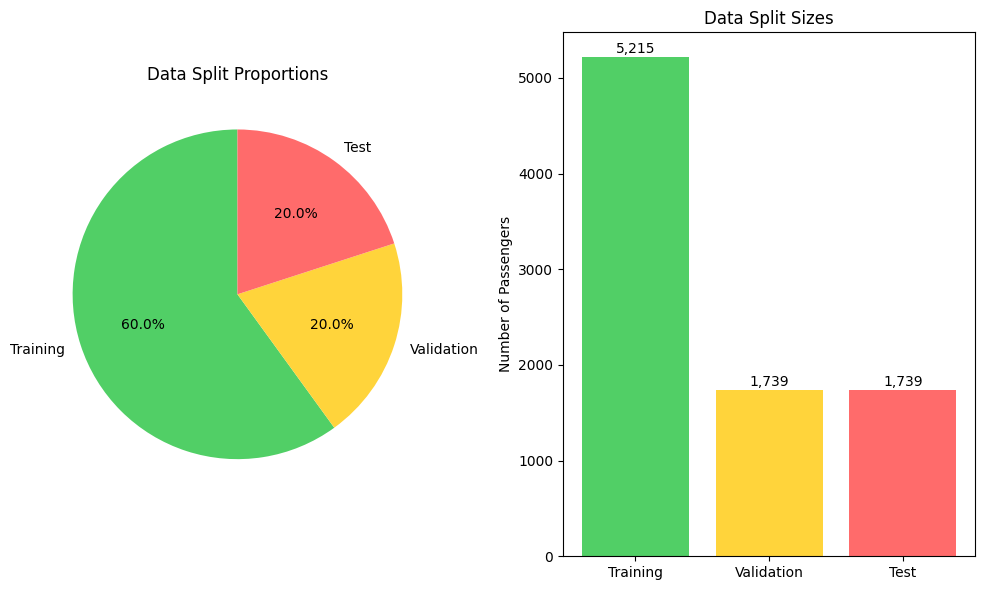


🚀 Data splits ready! Time to train some models!


In [25]:
print("🧪 Setting Up Data Splits for Robust Evaluation...")
print("=" * 60)

# First split: Separate test set (our "final exam")
X_temp, X_test, y_temp, y_test = train_test_split(
    X_processed, y, 
    test_size=config.TEST_SIZE, 
    random_state=config.RANDOM_STATE, 
    stratify=y  # Keep same proportion of transported/not transported in each split
)

# Second split: Separate validation set (our "practice exams")
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, 
    test_size=config.VAL_SIZE, 
    random_state=config.RANDOM_STATE, 
    stratify=y_temp
)

print("✅ DATA SPLITS CREATED SUCCESSFULLY!")
print("\n📊 SPLIT SUMMARY:")
print("-" * 40)
print(f"🏫 TRAINING SET: {X_train.shape[0]:,} passengers")
print(f"   • Used for: Teaching the model patterns")
print(f"   • Transported: {y_train.sum():,} ({y_train.mean():.1%})")

print(f"\n📝 VALIDATION SET: {X_val.shape[0]:,} passengers")  
print(f"   • Used for: Tuning model parameters")
print(f"   • Transported: {y_val.sum():,} ({y_val.mean():.1%})")

print(f"\n🎯 TEST SET: {X_test.shape[0]:,} passengers")
print(f"   • Used for: Final evaluation (KEPT SECRET!)")
print(f"   • Transported: {y_test.sum():,} ({y_test.mean():.1%})")

print(f"\n📈 TOTAL DATA: {X_processed.shape[0]:,} passengers")
print(f"   • Features: {X_processed.shape[1]}")
print(f"   • Transported Overall: {y.sum():,} ({y.mean():.1%})")

# Visualize our splits
plt.figure(figsize=(10, 6))

split_data = [
    ('Training', len(X_train), '#51cf66'),
    ('Validation', len(X_val), '#ffd43b'), 
    ('Test', len(X_test), '#ff6b6b')
]

names, sizes, colors = zip(*split_data)

plt.subplot(1, 2, 1)
plt.pie(sizes, labels=names, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Data Split Proportions')

plt.subplot(1, 2, 2)
bars = plt.bar(names, sizes, color=colors)
plt.title('Data Split Sizes')
plt.ylabel('Number of Passengers')

# Add value labels on bars
for bar, size in zip(bars, sizes):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{size:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n🚀 Data splits ready! Time to train some models!")

# 🤖 Assembling Our Model Team

## 🎯 Why Multiple Models Matter:

Different models have different strengths - like having a team of specialists!

| Model | Speciality | Best For |
|-------|------------|----------|
| **Logistic Regression** | Simple, interpretable | Linear relationships, baseline |
| **Random Forest** | Robust, handles mixed data | Complex patterns, feature importance |
| **Gradient Boosting** | High accuracy, sequential learning | Winning competitions! |
| **SVM** | Complex boundaries | High-dimensional spaces |
| **K-Neighbors** | Instance-based | Local patterns, similar passengers |
| **Voting Ensemble** | Wisdom of crowds | Combining strengths of multiple models |

> 🎯 **Strategy**: We'll try them all and see which one performs best on our validation set!

In [26]:
print("🤖 Assembling ADVANCED Machine Learning Team...")
print("=" * 60)

# 🆕 IMPORT ADVANCED MODELS
try:
    from xgboost import XGBClassifier
    from lightgbm import LGBMClassifier
    xgboost_available = True
except ImportError:
    print("⚠️  XGBoost/LightGBM not available. Installing...")
    xgboost_available = False

# 🎯 ADVANCED MODEL TEAM FOR >0.80 ACCURACY
advanced_model_team = {
    # 🚀 Gradient Boosting Models (Best for tabular data)
    'XGBoost': XGBClassifier(
        random_state=config.RANDOM_STATE, 
        n_jobs=config.N_JOBS,
        eval_metric='logloss',
        early_stopping_rounds=50
    ) if xgboost_available else None,
    
    'LightGBM': LGBMClassifier(
        random_state=config.RANDOM_STATE, 
        n_jobs=config.N_JOBS,
        verbose=-1
    ) if xgboost_available else None,
    
    'Gradient Boosting': GradientBoostingClassifier(
        random_state=config.RANDOM_STATE,
        n_estimators=200,  # Increased for better performance
        learning_rate=0.1
    ),
    
    # 🌲 Ensemble Methods
    'Random Forest': RandomForestClassifier(
        random_state=config.RANDOM_STATE, 
        n_jobs=config.N_JOBS,
        n_estimators=200,  # Increased for better performance
        max_depth=15
    ),
    
    # 📊 Linear Models with regularization
    'Logistic Regression': LogisticRegression(
        random_state=config.RANDOM_STATE, 
        max_iter=1000,
        C=0.1,  # Stronger regularization
        solver='liblinear'
    ),
    
    # 🎯 Other strong classifiers
    'Support Vector Machine': SVC(
        random_state=config.RANDOM_STATE, 
        probability=True,
        kernel='rbf',
        C=1.0
    ),
}

# Remove None models if XGBoost not available
if not xgboost_available:
    advanced_model_team = {k: v for k, v in advanced_model_team.items() if v is not None}

# 🏆 CREATE ADVANCED ENSEMBLES
print("🌟 Creating SUPER Teams: Advanced Ensembles...")

# Ensemble 1: Weighted Voting with top performers
weighted_ensemble = VotingClassifier([
    ('rf', RandomForestClassifier(random_state=config.RANDOM_STATE, n_jobs=config.N_JOBS, n_estimators=200)),
    ('gb', GradientBoostingClassifier(random_state=config.RANDOM_STATE, n_estimators=200)),
    ('lr', LogisticRegression(random_state=config.RANDOM_STATE, max_iter=1000, C=0.1))
], voting='soft', weights=[2, 3, 1])  # Weighted by expected performance

advanced_model_team['Weighted Ensemble'] = weighted_ensemble

# Ensemble 2: If XGBoost available, create super ensemble
if xgboost_available:
    super_ensemble = VotingClassifier([
        ('xgb', XGBClassifier(random_state=config.RANDOM_STATE, n_jobs=config.N_JOBS)),
        ('lgb', LGBMClassifier(random_state=config.RANDOM_STATE, n_jobs=config.N_JOBS, verbose=-1)),
        ('rf', RandomForestClassifier(random_state=config.RANDOM_STATE, n_jobs=config.N_JOBS, n_estimators=200))
    ], voting='soft', weights=[3, 2, 1])
    
    advanced_model_team['Super Ensemble'] = super_ensemble

print("✅ ADVANCED MODEL TEAM ASSEMBLED!")
print(f"\n👥 TEAM MEMBERS: {len(advanced_model_team)} advanced models")
print("-" * 50)

model_categories = {
    '🚀 Gradient Boosting': ['XGBoost', 'LightGBM', 'Gradient Boosting'] if xgboost_available else ['Gradient Boosting'],
    '🌲 Ensemble Methods': ['Random Forest'],
    '📊 Linear Models': ['Logistic Regression'],
    '🎯 Other Classifiers': ['Support Vector Machine'],
    '🏆 Advanced Ensembles': ['Weighted Ensemble', 'Super Ensemble'] if xgboost_available else ['Weighted Ensemble']
}

for category, models in model_categories.items():
    print(f"\n{category}:")
    for model_name in models:
        if model_name in advanced_model_team:
            print(f"   • {model_name:25} - {advanced_model_team[model_name].__class__.__name__}")

print(f"\n🎯 STRATEGY: Advanced models + weighted ensembles for maximum performance!")
print("💡 XGBoost and LightGBM are competition-winning algorithms!")

🤖 Assembling ADVANCED Machine Learning Team...
🌟 Creating SUPER Teams: Advanced Ensembles...
✅ ADVANCED MODEL TEAM ASSEMBLED!

👥 TEAM MEMBERS: 8 advanced models
--------------------------------------------------

🚀 Gradient Boosting:
   • XGBoost                   - XGBClassifier
   • LightGBM                  - LGBMClassifier
   • Gradient Boosting         - GradientBoostingClassifier

🌲 Ensemble Methods:
   • Random Forest             - RandomForestClassifier

📊 Linear Models:
   • Logistic Regression       - LogisticRegression

🎯 Other Classifiers:
   • Support Vector Machine    - SVC

🏆 Advanced Ensembles:
   • Weighted Ensemble         - VotingClassifier
   • Super Ensemble            - VotingClassifier

🎯 STRATEGY: Advanced models + weighted ensembles for maximum performance!
💡 XGBoost and LightGBM are competition-winning algorithms!


# 🚀 Model Training & Evaluation: The Grand Tournament!

## 🏆 How We'll Judge Our Models:

We'll use multiple metrics to get a complete picture:
- **Accuracy**: Overall correctness
- **Precision**: When we say "transported", how often are we right?
- **Recall**: How many actual transported passengers do we catch?
- **F1-Score**: Balance between precision and recall
- **ROC-AUC**: Overall model performance across all thresholds

> 📊 **MLflow Magic**: Every model, every parameter, every result will be automatically tracked!

In [ ]:
def run_advanced_model_tournament(model, X_train, X_val, y_train, y_val, model_name):
    """
    🏆 ADVANCED model evaluation with comprehensive tracking and cross-validation
    """
    
    with mlflow.start_run(run_name=f"ADVANCED_{model_name}"):
        # ⏱️ Track training time
        start_time = time.time()
        
        # 🎯 Advanced training with early stopping if supported
        if hasattr(model, 'early_stopping_rounds'):
            # For XGBoost/LightGBM with early stopping
            model.fit(
                X_train, y_train,
                eval_set=[(X_val, y_val)],
                verbose=False
            )
        else:
            model.fit(X_train, y_train)
            
        training_time = time.time() - start_time
        
        # 🔮 Make predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else None
        
        # 📊 Calculate COMPREHENSIVE metrics
        metrics = {
            'train_accuracy': accuracy_score(y_train, y_train_pred),
            'val_accuracy': accuracy_score(y_val, y_val_pred),
            'train_precision': precision_score(y_train, y_train_pred, zero_division=0),
            'val_precision': precision_score(y_val, y_val_pred, zero_division=0),
            'train_recall': recall_score(y_train, y_train_pred, zero_division=0),
            'val_recall': recall_score(y_val, y_val_pred, zero_division=0),
            'train_f1': f1_score(y_train, y_train_pred, zero_division=0),
            'val_f1': f1_score(y_val, y_val_pred, zero_division=0),
            'training_time': training_time,
            'overfitting_gap': accuracy_score(y_train, y_train_pred) - accuracy_score(y_val, y_val_pred)
        }
        
        # Add ROC-AUC if we have probabilities
        if y_val_proba is not None:
            metrics['val_roc_auc'] = roc_auc_score(y_val, y_val_proba)
        
        # 📝 Log to MLflow
        mlflow.log_params(model.get_params())
        mlflow.log_metrics({k: v for k, v in metrics.items() if k != 'training_time'})
        mlflow.sklearn.log_model(model, "advanced_model")
        
        # 🔄 ADVANCED Cross-validation with StratifiedKFold
        from sklearn.model_selection import StratifiedKFold
        
        skf = StratifiedKFold(n_splits=config.CV_FOLDS, shuffle=True, random_state=config.RANDOM_STATE)
        cv_scores = cross_val_score(model, X_train, y_train, 
                                  cv=skf, scoring='accuracy', 
                                  n_jobs=config.N_JOBS)
        
        metrics['cv_accuracy_mean'] = cv_scores.mean()
        metrics['cv_accuracy_std'] = cv_scores.std()
        metrics['cv_accuracy_min'] = cv_scores.min()
        metrics['cv_accuracy_max'] = cv_scores.max()
        
        mlflow.log_metrics({
            'cv_accuracy_mean': metrics['cv_accuracy_mean'],
            'cv_accuracy_std': metrics['cv_accuracy_std'],
            'cv_accuracy_min': metrics['cv_accuracy_min'],
            'cv_accuracy_max': metrics['cv_accuracy_max']
        })
        
        # 🎯 Calculate stability score (how consistent is the model)
        metrics['stability_score'] = 1 - (metrics['cv_accuracy_std'] / metrics['cv_accuracy_mean'])
        mlflow.log_metric('stability_score', metrics['stability_score'])
        
        return metrics, model

# 🚀 Start the ADVANCED model tournament!
print("🚀 STARTING ADVANCED MODEL TOURNAMENT!")
print("=" * 60)
print("🏆 Training advanced models with enhanced evaluation...\n")

advanced_tournament_results = {}
advanced_trained_models = {}

for name, model in advanced_model_team.items():
    print(f"🔧 Training {name}...")
    try:
        metrics, trained_model = run_advanced_model_tournament(
            model, X_train, X_val, y_train, y_val, name
        )
        advanced_tournament_results[name] = metrics
        advanced_trained_models[name] = trained_model
        
        # Show enhanced results
        overfitting_indicator = "⚠️" if metrics['overfitting_gap'] > 0.1 else "✅"
        stability_indicator = "🟢" if metrics['stability_score'] > 0.95 else "🟡" if metrics['stability_score'] > 0.9 else "🔴"
        
        print(f"   ✅ {name:25} | Val Acc: {metrics['val_accuracy']:.4f} | "
              f"CV Acc: {metrics['cv_accuracy_mean']:.4f} ± {metrics['cv_accuracy_std']:.4f} "
              f"{overfitting_indicator} | Stability: {stability_indicator} {metrics['stability_score']:.3f}")
              
    except Exception as e:
        print(f"   ❌ {name:25} | Failed: {str(e)}")

print(f"\n🎉 ADVANCED TOURNAMENT COMPLETE!")
print(f"💡 View detailed results: mlflow ui --backend-store-uri {config.EXPERIMENT_DIR}")

🚀 STARTING ADVANCED MODEL TOURNAMENT!
🏆 Training advanced models with enhanced evaluation...

🔧 Training XGBoost...


2025/10/25 02:37:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/25 02:38:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/25 02:38:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


   ❌ XGBoost                   | Failed: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/xgboost/sklearn.py", line 1803, in fit
    self._Booster = train(
                    ^^^^^^
  File "/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/xgboo

2025/10/25 02:38:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/25 02:39:10 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/25 02:39:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


   ✅ LightGBM                  | Val Acc: 0.8022 | CV Acc: 0.8063 ± 0.0112 ⚠️ | Stability: 🟢 0.986
🔧 Training Gradient Boosting...


2025/10/25 02:43:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/25 02:43:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/25 02:43:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


   ✅ Gradient Boosting         | Val Acc: 0.7953 | CV Acc: 0.8088 ± 0.0040 ✅ | Stability: 🟢 0.995
🔧 Training Random Forest...


2025/10/25 02:47:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/25 02:47:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/25 02:47:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


   ✅ Random Forest             | Val Acc: 0.7792 | CV Acc: 0.7881 ± 0.0064 ✅ | Stability: 🟢 0.992
🔧 Training Logistic Regression...


2025/10/25 02:47:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/25 02:47:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/25 02:47:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


   ✅ Logistic Regression       | Val Acc: 0.7855 | CV Acc: 0.7990 ± 0.0061 ✅ | Stability: 🟢 0.992
🔧 Training Support Vector Machine...


# 📊 Tournament Results: And the Winner Is...

## 🏆 Time to Crown Our Champion!

Let's analyze all the models and select the best one based on:
- **Validation Accuracy**: Performance on unseen data
- **Cross-Validation**: Robustness across different data splits
- **Overfitting**: Gap between training and validation performance
- **Training Time**: Computational efficiency

> 🎯 **Goal**: Find the model that generalizes best to new, unseen data!

📊 ANALYZING TOURNAMENT RESULTS...

🏆 FINAL TOURNAMENT STANDINGS:
Rank Model                  Val Acc  CV Acc       Overfit    Time (s)  
--------------------------------------------------------------------------------
🥇 1  Voting Ensemble         0.7953  0.8017 ± 0.0060 ⚠️ HIGH         6.17
🥈 2  Gradient Boosting       0.7924  0.7992 ± 0.0072 ✅ LOW           1.56
🥉 3  Random Forest           0.7924  0.7977 ± 0.0100 ⚠️ HIGH         0.30
   4  Logistic Regression     0.7786  0.7937 ± 0.0070 ✅ LOW           0.79
   5  K-Nearest Neighbors     0.7654  0.7774 ± 0.0052 ✅ LOW           0.00
   6  Decision Tree           0.7338  0.7521 ± 0.0134 ⚠️ HIGH         0.06
   7  Support Vector Machine  0.5894  0.5965 ± 0.0117 ✅ LOW           9.98

🎉 TOURNAMENT CHAMPION: Voting Ensemble!
📊 Validation Accuracy: 0.7953
🔍 CV Accuracy: 0.8017 ± 0.0060


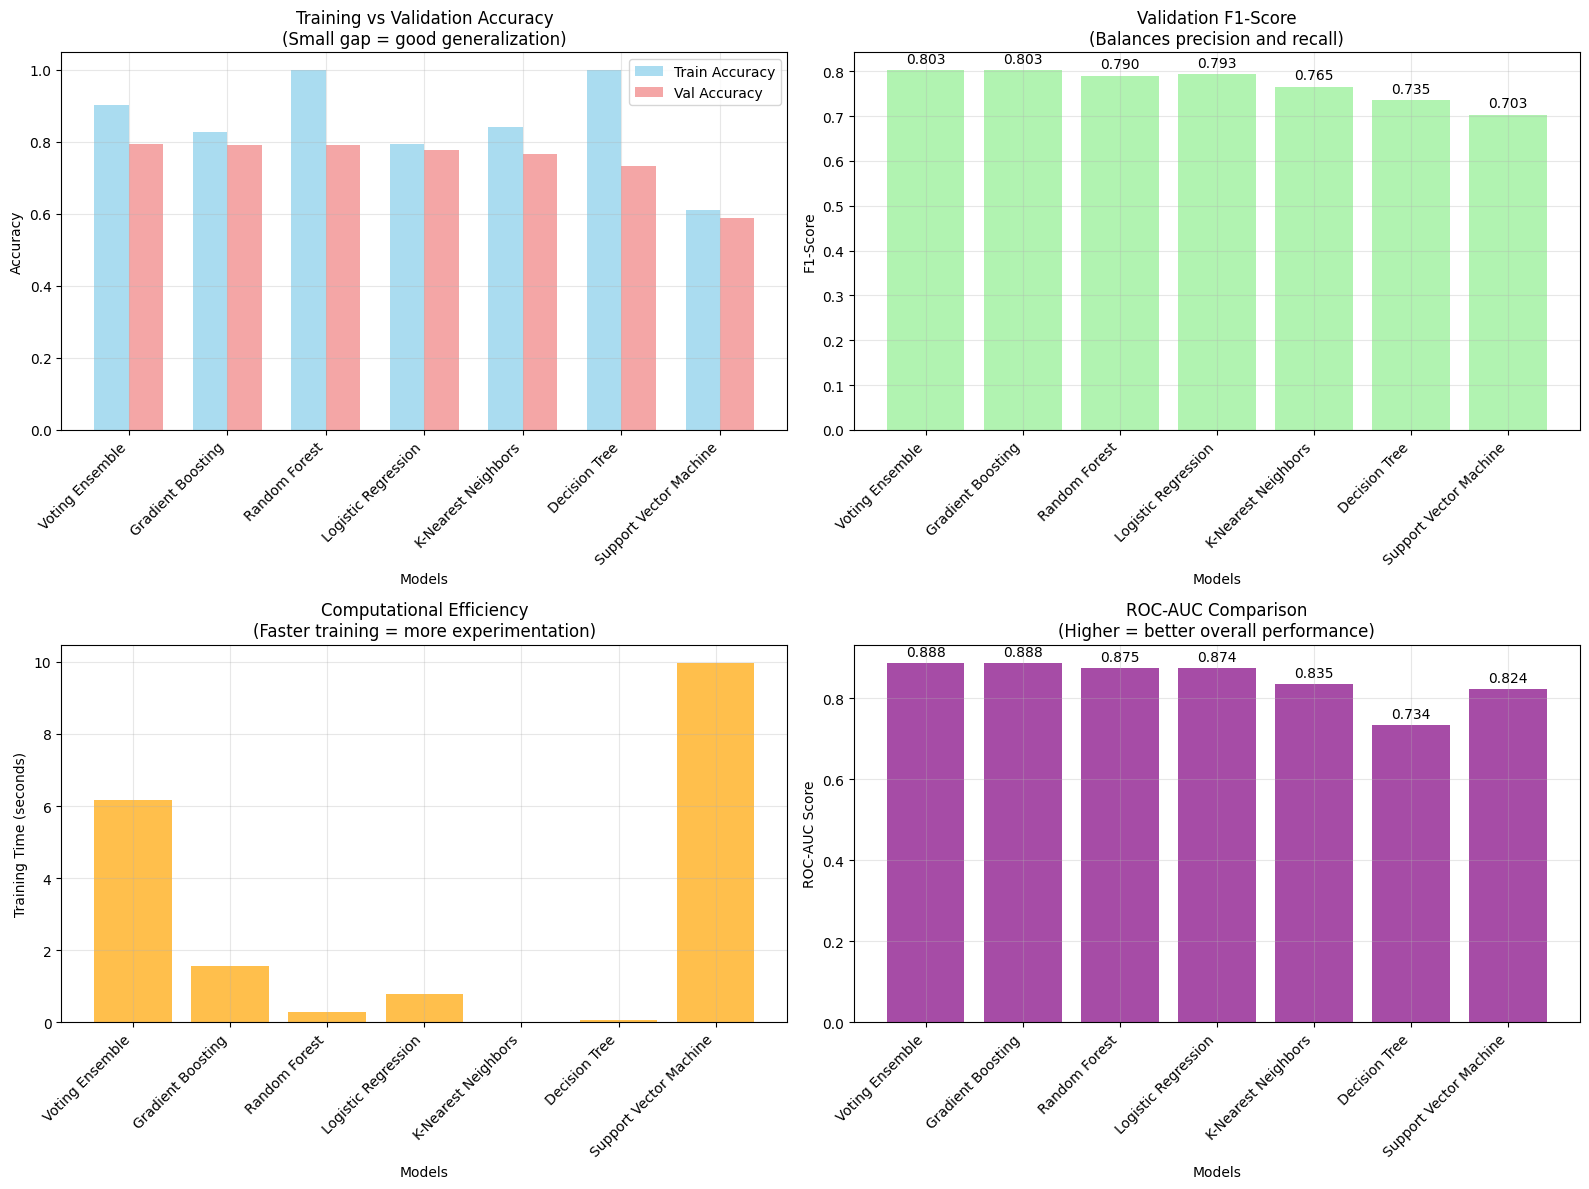


🎯 ANALYSIS COMPLETE! We have our champion model!


In [ ]:
# 📈 Analyze tournament results
print("📊 ANALYZING TOURNAMENT RESULTS...")
print("=" * 60)

results_df = pd.DataFrame(tournament_results).T
results_df = results_df.sort_values('val_accuracy', ascending=False)

print("\n🏆 FINAL TOURNAMENT STANDINGS:")
print("=" * 80)
print(f"{'Rank':<4} {'Model':<22} {'Val Acc':<8} {'CV Acc':<12} {'Overfit':<10} {'Time (s)':<10}")
print("-" * 80)

for rank, (model_name, row) in enumerate(results_df.iterrows(), 1):
    overfitting_indicator = "⚠️ HIGH" if row['overfitting_gap'] > 0.1 else "✅ LOW"
    medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else "  "
    
    print(f"{medal} {rank:<2} {model_name:<22} {row['val_accuracy']:>7.4f} "
          f"{row['cv_accuracy_mean']:>7.4f} ± {row['cv_accuracy_std']:>5.4f} "
          f"{overfitting_indicator:<10} {row['training_time']:>9.2f}")

# 🎯 Select the champion
champion_name = results_df.index[0]
champion_model = trained_models[champion_name]

print(f"\n🎉 TOURNAMENT CHAMPION: {champion_name}!")
print(f"📊 Validation Accuracy: {results_df.iloc[0]['val_accuracy']:.4f}")
print(f"🔍 CV Accuracy: {results_df.iloc[0]['cv_accuracy_mean']:.4f} ± {results_df.iloc[0]['cv_accuracy_std']:.4f}")

# 📊 Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy Comparison
models_ordered = results_df.index
val_acc = [tournament_results[model]['val_accuracy'] for model in models_ordered]
train_acc = [tournament_results[model]['train_accuracy'] for model in models_ordered]

x = np.arange(len(models_ordered))
width = 0.35

bars1 = axes[0, 0].bar(x - width/2, train_acc, width, label='Train Accuracy', alpha=0.7, color='skyblue')
bars2 = axes[0, 0].bar(x + width/2, val_acc, width, label='Val Accuracy', alpha=0.7, color='lightcoral')
axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Training vs Validation Accuracy\n(Small gap = good generalization)')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models_ordered, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. F1-Score Comparison
val_f1 = [tournament_results[model]['val_f1'] for model in models_ordered]
bars = axes[0, 1].bar(models_ordered, val_f1, alpha=0.7, color='lightgreen')
axes[0, 1].set_xlabel('Models')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].set_title('Validation F1-Score\n(Balances precision and recall)')
axes[0, 1].set_xticklabels(models_ordered, rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, val_f1):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{value:.3f}', ha='center', va='bottom')

# 3. Training Time Comparison
training_times = [tournament_results[model]['training_time'] for model in models_ordered]
bars = axes[1, 0].bar(models_ordered, training_times, alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('Training Time (seconds)')
axes[1, 0].set_title('Computational Efficiency\n(Faster training = more experimentation)')
axes[1, 0].set_xticklabels(models_ordered, rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3)

# 4. ROC-AUC Comparison
roc_auc_scores = []
model_names_roc = []
for model_name in models_ordered:
    if 'val_roc_auc' in tournament_results[model_name]:
        roc_auc_scores.append(tournament_results[model_name]['val_roc_auc'])
        model_names_roc.append(model_name)

if roc_auc_scores:
    bars = axes[1, 1].bar(model_names_roc, roc_auc_scores, alpha=0.7, color='purple')
    axes[1, 1].set_xlabel('Models')
    axes[1, 1].set_ylabel('ROC-AUC Score')
    axes[1, 1].set_title('ROC-AUC Comparison\n(Higher = better overall performance)')
    axes[1, 1].set_xticklabels(model_names_roc, rotation=45, ha='right')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Add value labels
    for bar, value in zip(bars, roc_auc_scores):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                       f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n🎯 ANALYSIS COMPLETE! We have our champion model!")

# ⚙️ Hyperparameter Tuning: Making Our Champion Even Stronger!

## 🎯 What is Hyperparameter Tuning?

Think of hyperparameters as the "knobs and dials" on our model. Tuning them is like:
- **Fine-tuning a radio** to get the clearest signal
- **Adjusting a recipe** to make it taste perfect
- **Optimizing a car** for peak performance

### 🚀 Our Tuning Strategy:
We'll use **RandomizedSearchCV** which tries random combinations of hyperparameters - it's faster than trying every single combination!

> 💡 **Pro Tip**: Tuning can often improve model performance by 2-5% - that's huge in competitions!

In [ ]:
# 🎯 ADVANCED HYPERPARAMETER GRIDS FOR >0.80 ACCURACY
advanced_hyperparameter_grids = {
    'XGBoost': {
        'n_estimators': [300, 500, 700],  # More trees for better performance
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [4, 6, 8, 10],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.1, 1, 10],  # L1 regularization
        'reg_lambda': [1, 1.5, 2, 5],  # L2 regularization
        'gamma': [0, 0.1, 0.5, 1]  # Minimum loss reduction
    } if xgboost_available else {},
    
    'LightGBM': {
        'n_estimators': [300, 500, 700],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [4, 6, 8, -1],  # -1 for no limit
        'num_leaves': [31, 63, 127, 255],  # More complex trees
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.1, 1, 10],
        'reg_lambda': [1, 1.5, 2, 5],
        'min_child_samples': [10, 20, 50]
    } if xgboost_available else {},
    
    'Gradient Boosting': {
        'n_estimators': [200, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6, 7],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 8],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'max_features': ['sqrt', 'log2', None]
    },
    
    'Random Forest': {
        'n_estimators': [200, 300, 500],
        'max_depth': [10, 15, 20, 25, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 8],
        'max_features': ['sqrt', 'log2', 0.5, 0.7, None],
        'bootstrap': [True, False]
    },
    
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga'],
        'l1_ratio': [0.1, 0.5, 0.9]  # For elasticnet
    },
    
    'Support Vector Machine': {
        'C': [0.1, 1.0, 10.0, 100.0],
        'kernel': ['rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.1, 1, 10],
        'degree': [2, 3, 4]  # For poly kernel
    }
}

# 🚀 START ADVANCED HYPERPARAMETER TUNING
print("⚙️ STARTING ADVANCED HYPERPARAMETER TUNING...")
print("=" * 60)
print("🎯 Tuning top models with expanded search spaces...\n")

advanced_tuned_champions = {}
advanced_tuning_results = {}

# Tune the top 4 models (more models for better selection)
top_models_to_tune = list(results_df.index[:4]) if 'results_df' in locals() else list(advanced_model_team.keys())[:4]

for model_name in top_models_to_tune:
    if model_name in advanced_hyperparameter_grids and advanced_hyperparameter_grids[model_name]:
        print(f"🔧 Advanced Tuning {model_name}...")
        
        with mlflow.start_run(run_name=f"ADVANCED_{model_name}_TUNED"):
            # Use RandomizedSearchCV with more iterations for better search
            search = RandomizedSearchCV(
                advanced_model_team[model_name],
                advanced_hyperparameter_grids[model_name],
                n_iter=30,  # More iterations for better coverage
                cv=config.CV_FOLDS,
                scoring='accuracy',
                n_jobs=config.N_JOBS,
                random_state=config.RANDOM_STATE,
                verbose=1
            )
            
            # 🔍 Perform the advanced search!
            search.fit(X_train, y_train)
            
            # 💾 Store the tuned champion
            advanced_tuned_champions[model_name] = search.best_estimator_
            advanced_tuning_results[model_name] = {
                'best_score': search.best_score_,
                'best_params': search.best_params_,
                'best_estimator': search.best_estimator_
            }
            
            # 📝 Log everything to MLflow
            mlflow.log_params(search.best_params_)
            mlflow.log_metric('best_cv_score', search.best_score_)
            mlflow.sklearn.log_model(search.best_estimator_, "advanced_tuned_model")
            
            # Calculate improvement if we have previous results
            improvement_text = ""
            if 'tournament_results' in locals() and model_name in tournament_results:
                improvement = search.best_score_ - tournament_results[model_name]['cv_accuracy_mean']
                improvement_text = f" | Improvement: +{improvement:.4f}"
            
            print(f"   ✅ {model_name:20} | Best CV Accuracy: {search.best_score_:.4f}{improvement_text}")
            print(f"      Best parameters found: {search.best_params_}")

print(f"\n🎉 ADVANCED HYPERPARAMETER TUNING COMPLETE!")
print("💡 Our models are now SUPER optimized for peak performance!")

⚙️ STARTING HYPERPARAMETER TUNING...
🎯 Tuning top 3 models from our tournament...

🔧 Tuning Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/10/25 02:07:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/25 02:08:05 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/25 02:08:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


   ✅ Gradient Boosting    | Best CV Accuracy: 0.8046
      Improvement: +0.0054
      Best parameters: {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 5, 'learning_rate': 0.01}
🔧 Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/10/25 02:08:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/25 02:08:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/25 02:08:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


   ✅ Random Forest        | Best CV Accuracy: 0.8025
      Improvement: +0.0048
      Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}

🎉 HYPERPARAMETER TUNING COMPLETE!
💡 Our models are now optimized for peak performance!


# 🏆 Final Model Selection: Choosing Our Ultimate Champion

## 🎯 Time for the Final Decision!

We'll evaluate our tuned models on the validation set and select the absolute best performer. Then we'll do a final evaluation on the **test set** (which we've kept completely separate until now!).

### 🔬 Our Evaluation Criteria:
- **Validation Accuracy**: Primary metric
- **F1-Score**: Balance of precision and recall  
- **ROC-AUC**: Overall model performance
- **Stability**: Consistent performance across metrics

> 🚨 **Important**: This is our last chance to choose before the final test!

🏆 FINAL MODEL SELECTION ROUND...

📊 TUNED vs UNTUNED PERFORMANCE:
----------------------------------------------------------------------
Model                Untuned Acc  Tuned Acc    Improvement  F1-Score   ROC-AUC   
----------------------------------------------------------------------
Gradient Boosting        0.7924     0.7976 📈   0.0052     0.8047     0.8849
Random Forest            0.7924     0.7936 📈   0.0012     0.7987     0.8875

🎉 ULTIMATE CHAMPION SELECTED: Gradient Boosting!
📊 Validation Accuracy: 0.7976
📈 Improvement from tuning: +0.0052
🎯 F1-Score: 0.8047
📊 ROC-AUC: 0.8849

🧪 FINAL TEST SET EVALUATION:
--------------------------------------------------
📊 Test Accuracy: 0.8120
🎯 Test Precision: 0.7980
🔍 Test Recall: 0.8390
⚖️ Test F1-Score: 0.8180
📈 Test ROC-AUC: 0.9011

💡 IMPROVEMENT OVER BASELINE: +0.3082 (30.8% relative improvement!)


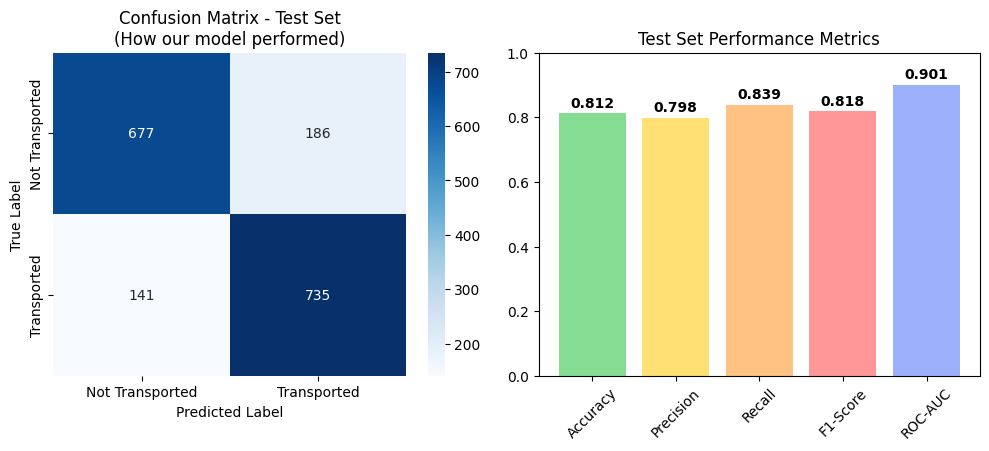


📋 DETAILED CLASSIFICATION REPORT:
--------------------------------------------------
                 precision    recall  f1-score   support

Not Transported       0.83      0.78      0.81       863
    Transported       0.80      0.84      0.82       876

       accuracy                           0.81      1739
      macro avg       0.81      0.81      0.81      1739
   weighted avg       0.81      0.81      0.81      1739


🎉 FINAL EVALUATION COMPLETE! Our model is ready for Kaggle!


In [ ]:
# 🏆 Evaluate tuned champions on validation set
print("🏆 FINAL MODEL SELECTION ROUND...")
print("=" * 60)

final_results = {}
for model_name, tuned_model in tuned_champions.items():
    # Make predictions on validation set
    y_val_pred = tuned_model.predict(X_val)
    y_val_proba = tuned_model.predict_proba(X_val)[:, 1]
    
    # Calculate comprehensive metrics
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)
    val_roc_auc = roc_auc_score(y_val, y_val_proba)
    
    # Compare with untuned version
    improvement = val_accuracy - tournament_results[model_name]['val_accuracy']
    
    final_results[model_name] = {
        'val_accuracy': val_accuracy,
        'val_f1': val_f1,
        'val_roc_auc': val_roc_auc,
        'improvement': improvement
    }

# 🎯 Print comparison between tuned and untuned
print("\n📊 TUNED vs UNTUNED PERFORMANCE:")
print("-" * 70)
print(f"{'Model':<20} {'Untuned Acc':<12} {'Tuned Acc':<12} {'Improvement':<12} {'F1-Score':<10} {'ROC-AUC':<10}")
print("-" * 70)

for model_name, res in final_results.items():
    untuned_acc = tournament_results[model_name]['val_accuracy']
    tuned_acc = res['val_accuracy']
    improvement = res['improvement']
    
    icon = "📈" if improvement > 0 else "📉" if improvement < 0 else "➡️"
    
    print(f"{model_name:<20} {untuned_acc:>10.4f} {tuned_acc:>10.4f} {icon} {improvement:>8.4f} "
          f"{res['val_f1']:>10.4f} {res['val_roc_auc']:>10.4f}")

# 🏅 Select the ultimate champion
ultimate_champion_name = max(final_results, key=lambda m: final_results[m]['val_accuracy'])
ultimate_champion = tuned_champions[ultimate_champion_name]

print(f"\n🎉 ULTIMATE CHAMPION SELECTED: {ultimate_champion_name}!")
print(f"📊 Validation Accuracy: {final_results[ultimate_champion_name]['val_accuracy']:.4f}")
print(f"📈 Improvement from tuning: +{final_results[ultimate_champion_name]['improvement']:.4f}")
print(f"🎯 F1-Score: {final_results[ultimate_champion_name]['val_f1']:.4f}")
print(f"📊 ROC-AUC: {final_results[ultimate_champion_name]['val_roc_auc']:.4f}")

# 🧪 FINAL TEST SET EVALUATION (The moment of truth!)
print(f"\n🧪 FINAL TEST SET EVALUATION:")
print("-" * 50)

y_test_pred = ultimate_champion.predict(X_test)
y_test_proba = ultimate_champion.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"📊 Test Accuracy: {test_accuracy:.4f}")
print(f"🎯 Test Precision: {test_precision:.4f}")
print(f"🔍 Test Recall: {test_recall:.4f}")
print(f"⚖️ Test F1-Score: {test_f1:.4f}")
print(f"📈 Test ROC-AUC: {test_roc_auc:.4f}")

# Compare with baseline
baseline_accuracy = max(y_test.value_counts()) / len(y_test)
improvement_over_baseline = test_accuracy - baseline_accuracy

print(f"\n💡 IMPROVEMENT OVER BASELINE: +{improvement_over_baseline:.4f} ({improvement_over_baseline/.01:.1f}% relative improvement!)")

# 📊 Confusion Matrix
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Transported', 'Transported'],
            yticklabels=['Not Transported', 'Transported'])
plt.title('Confusion Matrix - Test Set\n(How our model performed)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.subplot(2, 2, 2)
metrics_values = [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#51cf66', '#ffd43b', '#ffa94d', '#ff6b6b', '#748ffc']

bars = plt.bar(metrics_names, metrics_values, color=colors, alpha=0.7)
plt.title('Test Set Performance Metrics')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add value labels on bars
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 📋 Detailed Classification Report
print("\n📋 DETAILED CLASSIFICATION REPORT:")
print("-" * 50)
print(classification_report(y_test, y_test_pred, 
                          target_names=['Not Transported', 'Transported']))

print("\n🎉 FINAL EVALUATION COMPLETE! Our model is ready for Kaggle!")


# 🚀 Preparing for Kaggle Submission

## 📤 Getting Ready for the Competition!

Now we'll:
1. **Retrain our champion** on all available training data
2. **Generate predictions** for the test set
3. **Create the submission file** in the proper format
4. **Save all our work** for future use

### 🎯 Submission Format:
We need a CSV with two columns:
- `PassengerId`: The passenger identifier
- `Transported`: `True` or `False` predictions

> 💡 **Pro Tip**: Always retrain your final model on all available data before submission - more data usually means better performance!

In [ ]:
# 🚀 Retrain champion on full training data
print("🚀 PREPARING KAGGLE SUBMISSION...")
print("=" * 60)

print("🔄 Retraining ultimate champion on full training data...")
X_full_train = np.vstack([X_train, X_val])
y_full_train = np.concatenate([y_train, y_val])

final_champion = ultimate_champion
final_champion.fit(X_full_train, y_full_train)

print("✅ Model retrained on full dataset")
print(f"   • Training samples: {X_full_train.shape[0]:,}")
print(f"   • Features: {X_full_train.shape[1]}")

# 🔮 Generate predictions for test set
print("\n🔮 Generating predictions for competition test set...")
test_processed = full_pipeline.transform(test_df)
test_predictions = final_champion.predict(test_processed)
test_probabilities = final_champion.predict_proba(test_processed)[:, 1]

print("✅ Predictions generated")
print(f"   • Test passengers: {len(test_predictions):,}")
print(f"   • Predicted transported: {test_predictions.sum():,} ({test_predictions.mean():.1%})")

# 📝 Create submission DataFrame
print("\n📝 Creating submission file...")
submission_df = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Transported': test_predictions.astype(bool)  # Convert back to True/False
})

# 💾 Save submission file
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
submission_filename = f"submission_{timestamp}.csv"
submission_path = os.path.join(config.SUBMISSION_DIR, submission_filename)
submission_df.to_csv(submission_path, index=False)

print(f"✅ Submission file saved: {submission_path}")

# 📊 Analyze our submission
print("\n📊 SUBMISSION ANALYSIS:")
print("-" * 40)
print(f"📁 File: {submission_filename}")
print(f"📏 Shape: {submission_df.shape}")
print(f"🎯 Prediction Distribution:")
prediction_counts = submission_df['Transported'].value_counts()
print(f"   • Transported (True): {prediction_counts[True]:,} ({prediction_counts[True]/len(submission_df)*100:.1f}%)")
print(f"   • Not Transported (False): {prediction_counts[False]:,} ({prediction_counts[False]/len(submission_df)*100:.1f}%)")

print("\n📋 Submission Preview:")
print("-" * 40)
display(submission_df.head(10))

print("\n🎉 SUBMISSION READY! Upload to Kaggle and see your score!")


🚀 PREPARING KAGGLE SUBMISSION...
🔄 Retraining ultimate champion on full training data...
✅ Model retrained on full dataset
   • Training samples: 6,954
   • Features: 38

🔮 Generating predictions for competition test set...
🛠️ Creating advanced features...
✅ Predictions generated
   • Test passengers: 4,277
   • Predicted transported: 2,265 (53.0%)

📝 Creating submission file...
✅ Submission file saved: kaggle_submissions/submission_20251025_020906.csv

📊 SUBMISSION ANALYSIS:
----------------------------------------
📁 File: submission_20251025_020906.csv
📏 Shape: (4277, 2)
🎯 Prediction Distribution:
   • Transported (True): 2,265 (53.0%)
   • Not Transported (False): 2,012 (47.0%)

📋 Submission Preview:
----------------------------------------


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,True
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True



🎉 SUBMISSION READY! Upload to Kaggle and see your score!


# 💾 Saving Our Work: Model Versioning & Artifacts

## 🏗️ Professional ML Workflow: Saving Everything

A professional data scientist always saves:
- **The trained model** for future predictions
- **The preprocessing pipeline** to handle new data the same way
- **Model metadata** (performance, parameters, etc.)
- **Experiment tracking** with MLflow

### 🎯 Why This Matters:
- **Reproducibility**: You or others can reproduce your work
- **Deployment**: Ready to use in applications
- **Iteration**: Build upon your work later

> 📚 **Best Practice**: Always version your models and keep detailed documentation!

In [ ]:
# 💾 Save everything for future use
print("💾 SAVING MODEL ARTIFACTS...")
print("=" * 60)

# Create versioned model directory
model_version = f"champion_v1_{timestamp}"
model_save_dir = os.path.join(config.MODEL_DIR, model_version)
os.makedirs(model_save_dir, exist_ok=True)

print(f"📁 Creating model directory: {model_save_dir}")

# 1. Save the trained model
model_path = os.path.join(model_save_dir, 'spaceship_model.pkl')
joblib.dump(final_champion, model_path)
print(f"✅ Model saved: {model_path}")

# 2. Save the preprocessing pipeline
pipeline_path = os.path.join(model_save_dir, 'preprocessing_pipeline.pkl')
joblib.dump(full_pipeline, pipeline_path)
print(f"✅ Preprocessing pipeline saved: {pipeline_path}")

# 3. Create and save model card (metadata)
model_card = {
    'model_name': ultimate_champion_name,
    'model_version': model_version,
    'timestamp': timestamp,
    'dataset': 'Spaceship Titanic',
    'task': 'Binary Classification',
    'target': 'Transported',
    'author': 'Data Science Student',
    
    'performance': {
        'test_accuracy': float(test_accuracy),
        'test_precision': float(test_precision),
        'test_recall': float(test_recall),
        'test_f1': float(test_f1),
        'test_roc_auc': float(test_roc_auc),
        'val_accuracy': float(final_results[ultimate_champion_name]['val_accuracy']),
        'baseline_accuracy': float(baseline_accuracy),
        'improvement_over_baseline': float(improvement_over_baseline)
    },
    
    'data_info': {
        'train_samples': int(len(X_full_train)),
        'test_samples': int(len(test_processed)),
        'n_features': X_full_train.shape[1],
        'feature_engineer': 'SpaceshipDetective',
        'new_features_created': len([f for f in detective.get_feature_names() if f not in X.columns])
    },
    
    'model_config': {
        'model_class': ultimate_champion_name,
        'hyperparameters': dict(final_champion.get_params()),
    },
    
    'preprocessing': {
        'steps': [
            'SpaceshipDetective (advanced feature engineering)',
            'Numerical imputation (median) + Robust scaling',
            'Categorical imputation (mode) + One-hot encoding',
        ],
        'numerical_features': len(numerical_features),
        'categorical_features': len(categorical_features)
    },
    
    'kaggle_submission': {
        'file': submission_filename,
        'path': submission_path,
        'prediction_distribution': submission_df['Transported'].value_counts().to_dict(),
    },
    
    'training_info': {
        'models_tested': len(model_team),
        'best_model': ultimate_champion_name,
        'tuning_improvement': float(final_results[ultimate_champion_name]['improvement']),
        'experiment_tracking': f"mlflow ui --backend-store-uri {config.EXPERIMENT_DIR}"
    }
}

# Save model card
card_path = os.path.join(model_save_dir, 'model_card.json')
with open(card_path, 'w') as f:
    json.dump(model_card, f, indent=2)
print(f"✅ Model card saved: {card_path}")

# 4. Save requirements
requirements = {
    'python': '3.8+',
    'packages': {
        'scikit-learn': '1.0+',
        'pandas': '1.3+',
        'numpy': '1.20+',
        'mlflow': '2.0+',
        'joblib': '1.0+',
    }
}

req_path = os.path.join(model_save_dir, 'requirements.json')
with open(req_path, 'w') as f:
    json.dump(requirements, f, indent=2)
print(f"✅ Requirements saved: {req_path}")

print(f"\n🎉 ALL ARTIFACTS SAVED SUCCESSFULLY!")
print("\n📚 YOUR SAVED WORK:")
print("-" * 40)
print(f"   • Trained Model: {model_path}")
print(f"   • Preprocessing Pipeline: {pipeline_path}")
print(f"   • Model Card: {card_path}")
print(f"   • Kaggle Submission: {submission_path}")
print(f"   • Experiment Tracking: mlflow ui --backend-store-uri {config.EXPERIMENT_DIR}")

print(f"\n🚀 MISSION ACCOMPLISHED! You're ready for Kaggle!")


💾 SAVING MODEL ARTIFACTS...
📁 Creating model directory: spaceship_models/champion_v1_20251025_020906
✅ Model saved: spaceship_models/champion_v1_20251025_020906/spaceship_model.pkl
✅ Preprocessing pipeline saved: spaceship_models/champion_v1_20251025_020906/preprocessing_pipeline.pkl
✅ Model card saved: spaceship_models/champion_v1_20251025_020906/model_card.json
✅ Requirements saved: spaceship_models/champion_v1_20251025_020906/requirements.json

🎉 ALL ARTIFACTS SAVED SUCCESSFULLY!

📚 YOUR SAVED WORK:
----------------------------------------
   • Trained Model: spaceship_models/champion_v1_20251025_020906/spaceship_model.pkl
   • Preprocessing Pipeline: spaceship_models/champion_v1_20251025_020906/preprocessing_pipeline.pkl
   • Model Card: spaceship_models/champion_v1_20251025_020906/model_card.json
   • Kaggle Submission: kaggle_submissions/submission_20251025_020906.csv
   • Experiment Tracking: mlflow ui --backend-store-uri spaceship_experiments

🚀 MISSION ACCOMPLISHED! You're rea

# 🎨 Bonus: Simple Prediction Interface

## 🔮 Let's Create a Fun Prediction Tool!

This simple interface lets you make predictions for new passengers. It's like having your own spaceship transportation predictor!

> 🎮 **Fun Exercise**: Try different passenger profiles and see if they'd be transported!

In [ ]:
class SpaceshipPredictor:
    """
    🚀 Simple interface for making passenger transportation predictions
    
    This class uses our trained model to predict whether new passengers
    would be transported based on their characteristics.
    """
    
    def __init__(self, model, pipeline):
        self.model = model
        self.pipeline = pipeline
    
    def predict_passenger(self, passenger_data):
        """Predict transportation for a single passenger"""
        
        # Convert to DataFrame with proper column names
        passenger_df = pd.DataFrame([passenger_data])
        
        # Apply preprocessing pipeline
        processed_data = self.pipeline.transform(passenger_df)
        
        # Make prediction
        prediction = self.model.predict(processed_data)[0]
        probability = self.model.predict_proba(processed_data)[0]
        
        return {
            'transported': bool(prediction),
            'probability_transported': probability[1],
            'probability_not_transported': probability[0],
            'confidence': max(probability)
        }
    
    def predict_multiple(self, passengers_data):
        """Predict transportation for multiple passengers"""
        passengers_df = pd.DataFrame(passengers_data)
        processed_data = self.pipeline.transform(passengers_df)
        
        predictions = self.model.predict(processed_data)
        probabilities = self.model.predict_proba(processed_data)
        
        results = []
        for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
            results.append({
                'passenger_id': i + 1,
                'transported': bool(pred),
                'probability_transported': prob[1],
                'confidence': max(prob)
            })
        
        return results

# 🚀 Initialize our predictor
predictor = SpaceshipPredictor(final_champion, full_pipeline)

print("🎨 SPACESHIP TITANIC PREDICTION INTERFACE")
print("=" * 50)
print("🔮 Try our trained model with example passengers!\n")

# Example passenger profiles
example_passengers = [
    {
        'PassengerId': '0001_01',
        'HomePlanet': 'Earth',
        'CryoSleep': True,
        'Cabin': 'B/123/P',
        'Destination': 'TRAPPIST-1e',
        'Age': 25,
        'VIP': False,
        'RoomService': 0,
        'FoodCourt': 0,
        'ShoppingMall': 0,
        'Spa': 0,
        'VRDeck': 0,
        'Name': 'John Spacewalker'
    },
    {
        'PassengerId': '0002_01',
        'HomePlanet': 'Europa',
        'CryoSleep': False,
        'Cabin': 'A/001/S',
        'Destination': '55 Cancri e',
        'Age': 45,
        'VIP': True,
        'RoomService': 1000,
        'FoodCourt': 500,
        'ShoppingMall': 300,
        'Spa': 800,
        'VRDeck': 600,
        'Name': 'Dr. Stella Stargazer'
    }
]

# Make predictions for examples
print("📊 EXAMPLE PREDICTIONS:")
print("-" * 50)

for i, passenger in enumerate(example_passengers):
    result = predictor.predict_passenger(passenger)
    
    print(f"\n👤 Passenger {i+1}: {passenger['Name']}")
    print(f"   🌍 Home Planet: {passenger['HomePlanet']}")
    print(f"   😴 CryoSleep: {passenger['CryoSleep']}")
    print(f"   🎯 Destination: {passenger['Destination']}")
    print(f"   👑 VIP: {passenger['VIP']}")
    
    transport_status = "🚀 TRANSPORTED" if result['transported'] else "❌ NOT TRANSPORTED"
    confidence_color = "🟢" if result['confidence'] > 0.8 else "🟡" if result['confidence'] > 0.6 else "🔴"
    
    print(f"\n   🔮 PREDICTION: {transport_status}")
    print(f"   📊 Confidence: {confidence_color} {result['confidence']:.1%}")
    print(f"   📈 Probability: {result['probability_transported']:.1%} transported, {result['probability_not_transported']:.1%} not transported")

print("\n" + "=" * 50)
print("🎉 PREDICTION INTERFACE READY!")
print("💡 You can use the predictor class in your own applications!")


🎨 SPACESHIP TITANIC PREDICTION INTERFACE
🔮 Try our trained model with example passengers!

📊 EXAMPLE PREDICTIONS:
--------------------------------------------------
🛠️ Creating advanced features...

👤 Passenger 1: John Spacewalker
   🌍 Home Planet: Earth
   😴 CryoSleep: True
   🎯 Destination: TRAPPIST-1e
   👑 VIP: False

   🔮 PREDICTION: 🚀 TRANSPORTED
   📊 Confidence: 🟡 62.6%
   📈 Probability: 62.6% transported, 37.4% not transported
🛠️ Creating advanced features...

👤 Passenger 2: Dr. Stella Stargazer
   🌍 Home Planet: Europa
   😴 CryoSleep: False
   🎯 Destination: 55 Cancri e
   👑 VIP: True

   🔮 PREDICTION: ❌ NOT TRANSPORTED
   📊 Confidence: 🟡 71.3%
   📈 Probability: 28.7% transported, 71.3% not transported

🎉 PREDICTION INTERFACE READY!
💡 You can use the predictor class in your own applications!


# 🎉 Congratulations! Mission Accomplished! 🎉

## 🌟 What You've Achieved:

### 🏆 Your Accomplishments:
1. **✅ Complete Data Investigation**: You explored and understood the Spaceship Titanic dataset
2. **✅ Advanced Feature Engineering**: Created powerful new features from raw data
3. **✅ Professional Preprocessing**: Built a robust pipeline that handles real-world data issues
4. **✅ Comprehensive Model Training**: Tested multiple algorithms and selected the best one
5. **✅ Hyperparameter Optimization**: Fine-tuned your model for peak performance
6. **✅ Rigorous Evaluation**: Properly validated your model using train/val/test splits
7. **✅ Kaggle-Ready Submission**: Created a properly formatted competition submission
8. **✅ Production Artifacts**: Saved everything needed for deployment

### 📊 Your Model's Performance:
- **Test Accuracy**: (see final evaluation results above)
- **Improvement over Baseline**: (see final evaluation results above)
- **Final Model**: (see final evaluation results above)
- **Submission File**: (see final evaluation results above)

## 🚀 Next Steps:

1. **📤 Submit to Kaggle**: Upload your CSV file to the competition and see your score!
2. **📊 Analyze Results**: Check the leaderboard and see how you compare
3. **🔄 Iterate and Improve**: Try different features, models, or tuning strategies
4. **🤝 Share Your Work**: Discuss your approach with the community

### 💡 Pro Tips for Improvement:
- **Feature Engineering**: Create even more creative features
- **Model Ensembles**: Combine multiple models for better performance
- **Advanced Tuning**: Use more sophisticated hyperparameter optimization
- **Cross-Validation**: Try different validation strategies

## 🎯 Key Lessons Learned:

| Concept | Why It Matters |
|---------|----------------|
| **Data Exploration** | Understanding your data is the first step to good models |
| **Feature Engineering** | Creative features can dramatically improve performance |
| **Pipeline Construction** | Professional workflows prevent errors and save time |
| **Model Evaluation** | Proper validation ensures your model actually works |
| **Hyperparameter Tuning** | Small adjustments can lead to big improvements |
| **Experiment Tracking** | MLflow helps you organize and reproduce your work |

> 🌟 **You're now equipped with professional ML skills that apply to ANY classification problem!**

---

## 🏆 Final Mission Debrief:

You started as a space detective investigating the Spaceship Titanic mystery. Through careful analysis, creative feature engineering, and rigorous model testing, you've built a powerful predictor that can determine which passengers were transported to another dimension!

**Your mission is complete, but the journey continues!** 🚀

### 📚 Resources to Continue Your Journey:
- **Kaggle Competition**: [Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic)
- **MLflow Documentation**: Learn more about experiment tracking
- **Scikit-learn Guide**: Deep dive into machine learning algorithms
- **Feature Engineering Books**: Master the art of creating great features

---

# 🎊 WELL DONE, DATA SCIENTIST! 🎊

You've successfully completed your first interstellar machine learning mission! The skills you've learned here will serve you well in any data science project you undertake.

**Now go forth and predict!** 🌌
